Tarea 2 

Dianamaría Salem Bernal Flórez

Punto 1

Escribiré una función que muestre la proporción de nulos por atributos y el mapa de calor.

In [62]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.rcParams["figure.figsize"] = (8,5)
import itertools
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [4]:
#Cargar el dataset
df_eucalyptus = pd.read_csv('eucalyptus.csv')

In [5]:
# Cargar dataset Boston
df_boston = pd.read_csv('boston.csv')

In [6]:
def visualize_missing_values(df):

# Mostrar proporcion de nulos por columna
    for column in df.columns:
        
        if df[column].isnull().any():
            
            nulos = df[column].isnull().sum()
            present = df[column].notnull().sum()
            
            plt.figure()
            plt.pie([present, nulos], labels=['Presentes', 'Nulos'],autopct='%1.1f%%')
            plt.title(f'Columna: {column} - Distribución de valores')
            plt.show()

# Creación del mapa de calor

    mapa = df.isnull().astype(int)

    plt.figure(figsize=(12, 6))
    sns.heatmap(mapa, cmap=ListedColormap(['lightblue', 'lightcoral']), cbar=False)

    plt.title("Mapa de calor de valores faltantes")
    plt.xlabel("Columnas")
    plt.ylabel("Instancias")
    plt.show()   
    
    

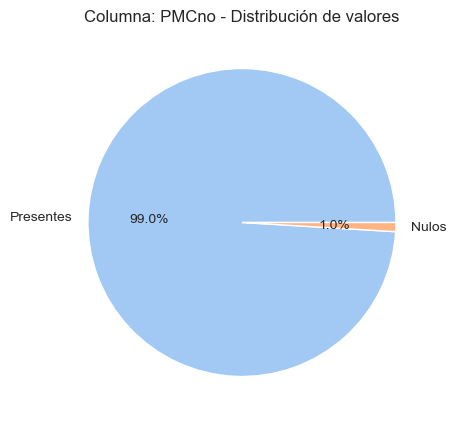

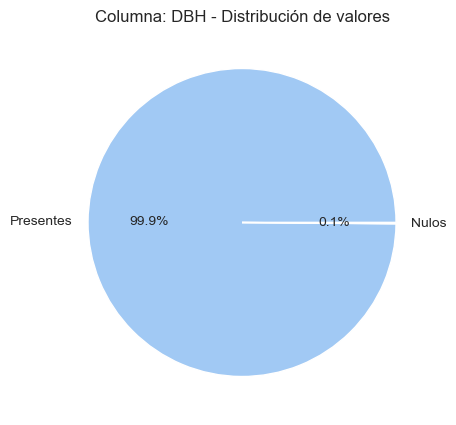

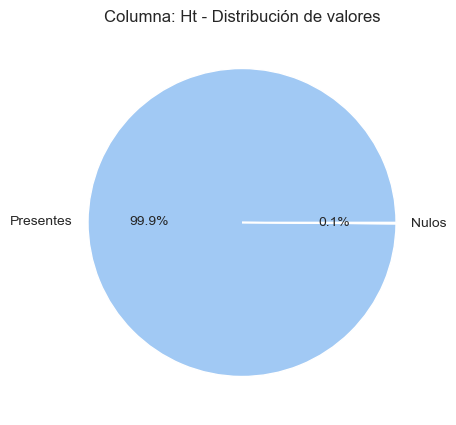

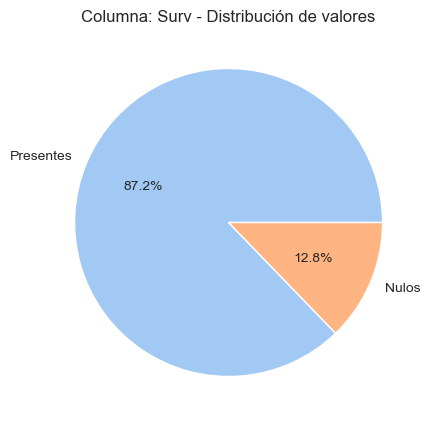

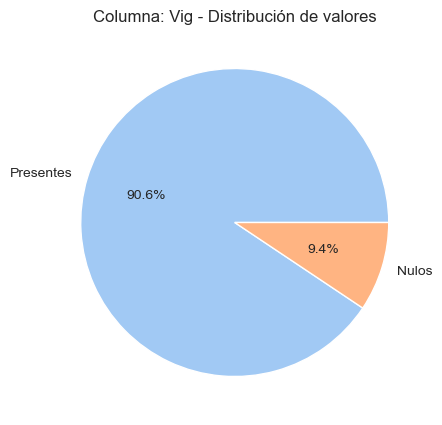

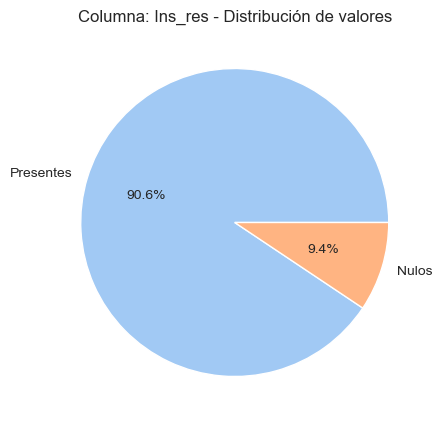

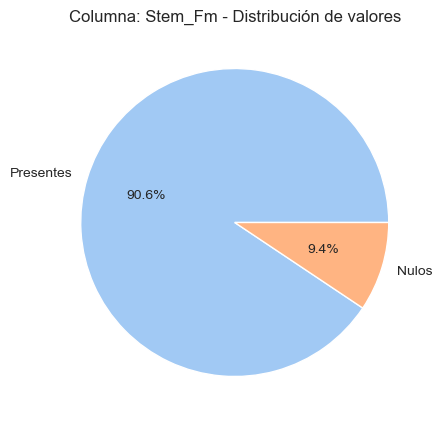

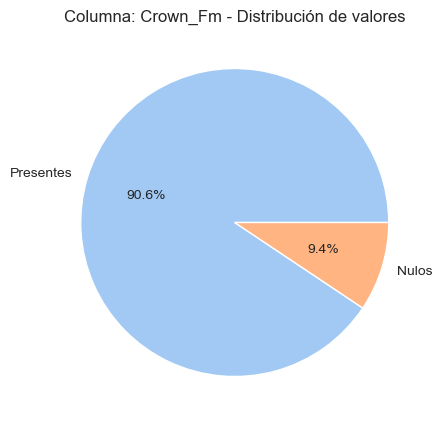

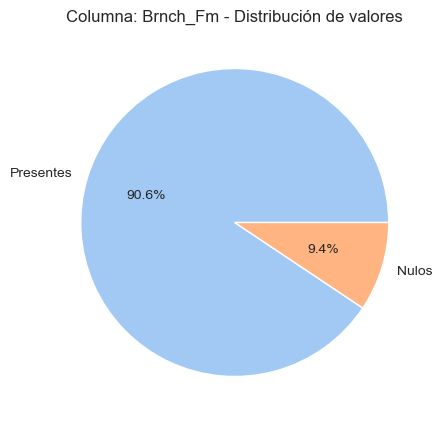

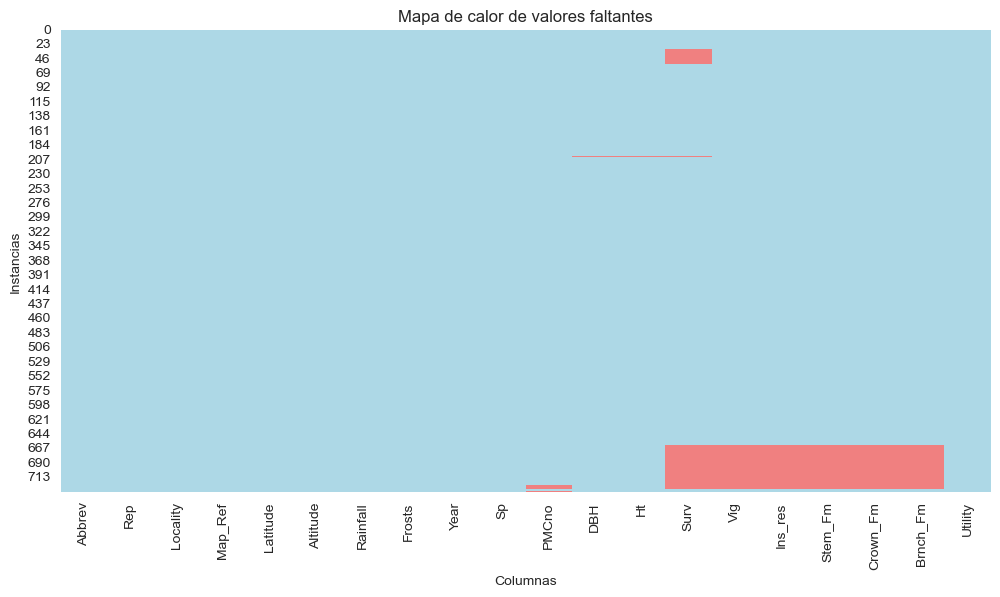

In [7]:
visualize_missing_values(df_eucalyptus)

In [8]:
df_eucalyptus.shape

(736, 20)

1. De las 20 columnas que contiene el dataset, 8 contienen valores nulos.

2. Podemos observar que los atributos que contienen faltantes no superan el 10% de los registros con nulos.

3. Cinco atributos contienen 9.4% de valores faltantes, tres atributos contienen 0.1% de valores faltantes y la variable que más contiene nulos es "Surv" con 12.8% de nulos.

4. Los registros que más contienen nulos son los que están a partir de la linea 667 aproximadamente y en algunas variales que se encuentran cercanas. Se observa un claro patrón horizaontal en la mayoría de los nulos.

Punto 2

In [102]:
def get_column_types(df):

    A = df.select_dtypes(include=['number']).columns.tolist()
    B = df.select_dtypes(include=['object', 'category', 'boolean']).columns.tolist()
      
    return A, B


In [103]:
get_column_types(df_eucalyptus)

(['Rep',
  'Altitude',
  'Rainfall',
  'Frosts',
  'Year',
  'PMCno',
  'DBH',
  'Ht',
  'Surv',
  'Vig',
  'Ins_res',
  'Stem_Fm',
  'Crown_Fm',
  'Brnch_Fm'],
 ['Abbrev', 'Locality', 'Map_Ref', 'Latitude', 'Sp', 'Utility'])

Punto 3

In [12]:
def visualize_target(df, label):

    A, B = get_column_types(df)

    # Identificar el tipo de variable objetivo
    if label in A:
        print(f"Ejercicio de Regresion")

        # 1 Histograma para variable numérica
        plt.figure()
        sns.histplot(x=label, data=df)
        plt.title(f"Distribución de {label}")
        plt.show()

        # 2. Boxplot para variable numérica
        plt.figure()
        sns.boxplot(x=label, data=df)
        plt.title(f"Boxplot de {label}")
        plt.show()

        # 3. Violín plot para variable numérica
        plt.figure()
        sns.violinplot(x=label, data=df)
        plt.title(f"Violín plot de {label}")
        plt.show()

        # 4. Medidas de tendencia central y dispersión para variable numérica
        df[label].describe()
  
    elif label in B:
        print(f"Ejercicio de Clasificacion")
       
        # 1. Gráfico de barras para variable categórica
        plt.figure()
        df[label].value_counts().plot(kind='bar')
        plt.title(f"Gráfico de barras para {label}")
        plt.show()

        # 2. Diagrama de pastel para variable categórica
        plt.figure()
        df[label].value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.title(f"Diagrama de pastel para {label}")
        plt.show()

        # 3. Tabla de frecuencias para variable categórica
        tabla_frecuencias = df[label].value_counts()
        print(tabla_frecuencias)





Ejercicio de Clasificacion


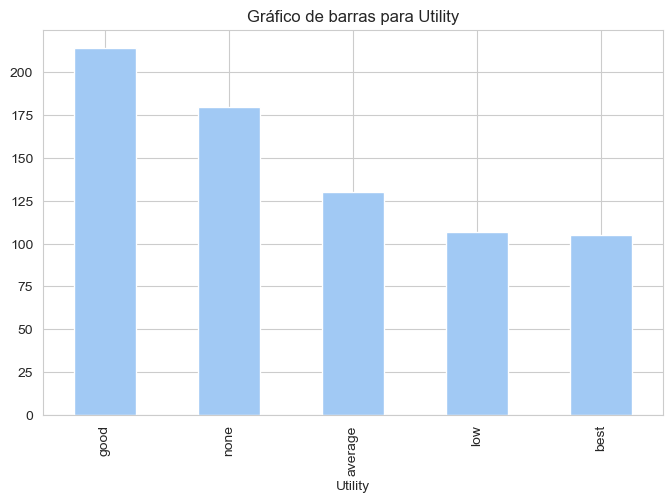

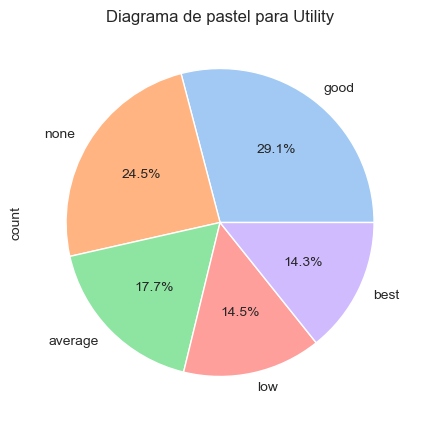

Utility
good       214
none       180
average    130
low        107
best       105
Name: count, dtype: int64


In [13]:
visualize_target(df_eucalyptus, 'Utility')

Ejercicio de Regresion


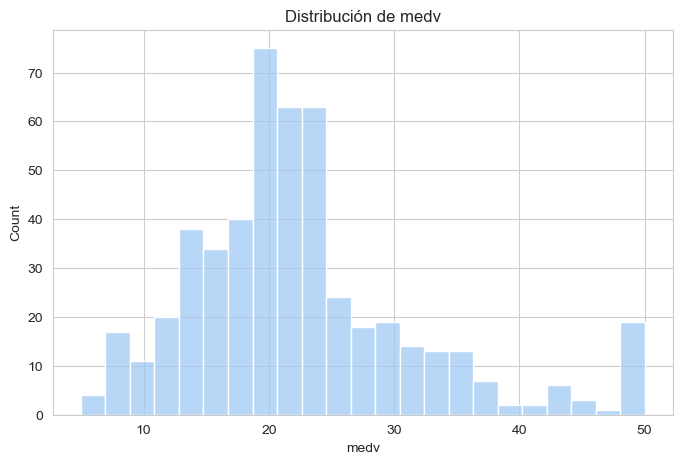

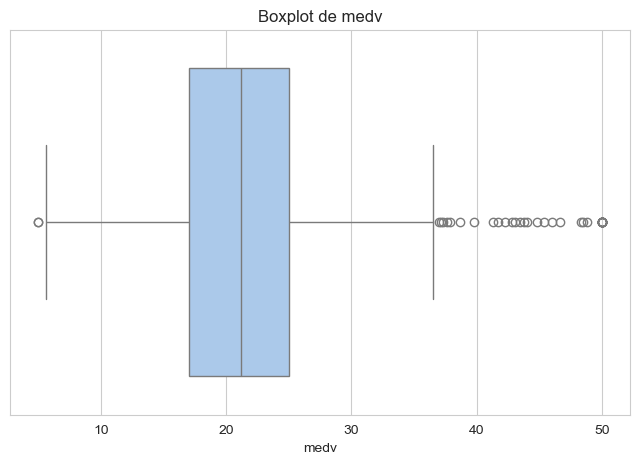

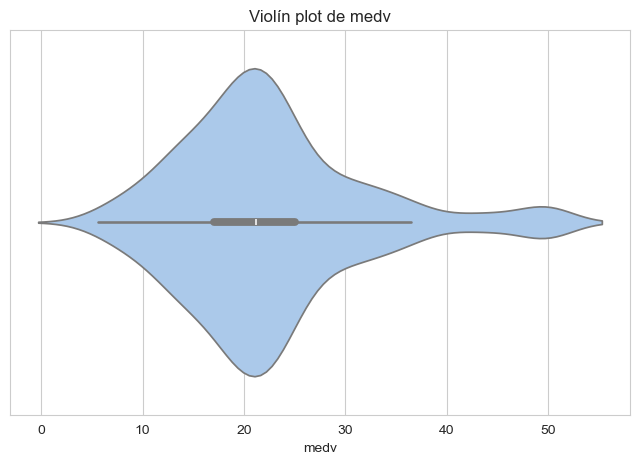

In [14]:
visualize_target(df_boston, 'medv')

Punto 4.1

In [23]:
def visualize_attributes_against_target(df, label):

    A, B = get_column_types(df)

    atributos_num = [col for col in A if col != label]
    atributos_cat = [col for col in B if col != label]
    column_num_num = 2
    column_cat_num = 2
    column_cat_cat = 2

    # REGRESIÓN

    if label in A:

        print("Ejercicio de Regresión")

        # Numérico vs Numérico
    
        if len(atributos_num) > 0:

            fig, axes = plt.subplots(nrows=len(atributos_num), ncols=column_num_num,figsize=(14, 4 * len(atributos_num)))
            # Si solo hay una fila, convertir axes en 2D
            if len(atributos_num) == 1: axes = [axes]

            for i, col in enumerate(atributos_num):

                # Scatterplot
                sns.scatterplot(x=col, y=label,data=df,ax=axes[i][0],alpha=0.6)
                axes[i][0].set_title(f"{col} vs {label}")

                # Regplot
                sns.regplot(x=col, y=label,data=df,ax=axes[i][1],scatter=False,color="red")
                axes[i][1].set_title(f"{col} vs {label} (Regresión)")

            plt.tight_layout()
            plt.show()

        # Categórico vs Numérico
        
        if len(atributos_cat) > 0:

            fig, axes = plt.subplots(nrows=len(atributos_cat),ncols=column_cat_num,figsize=(14, 4 * len(atributos_cat)))

            if len(atributos_cat) == 1:
                axes = [axes]

            for i, col in enumerate(atributos_cat):

                # Boxplot
                sns.boxplot(x=col, y=label,data=df,ax=axes[i][0],palette="pastel")
                axes[i][0].set_title(f"{col} vs {label} (Boxplot)")

                # Violin
                sns.violinplot(x=col, y=label,data=df,ax=axes[i][1],palette="pastel")
                axes[i][1].set_title(f"{col} vs {label} (Violin)")

            plt.tight_layout()
            plt.show()

    # CLASIFICACIÓN
    
    elif label in B:

        print("Ejercicio de Clasificación")

        # Categórico vs Categórico
        
        if len(atributos_cat) > 0:

            fig, axes = plt.subplots(nrows=len(atributos_cat),ncols=column_cat_cat,figsize=(14, 4 * len(atributos_cat)))

            if len(atributos_cat) == 1:
                axes = [axes]

            for i, col in enumerate(atributos_cat):

                # Countplot
                sns.countplot(x=col,hue=label,data=df,ax=axes[i][0],palette="pastel")
                axes[i][0].set_title(f"{col} por {label}")

                # Heatmap de tabla cruzada
                tabla = pd.crosstab(df[col], df[label])
                sns.heatmap(tabla,annot=True,fmt="d",cmap="Blues",ax=axes[i][1])
                axes[i][1].set_title(f"Heatmap {col} vs {label}")

            plt.tight_layout()
            plt.show()


        # Numérico vs Categórico
        
        if len(atributos_num) > 0:

            fig, axes = plt.subplots(nrows=len(atributos_num),ncols=column_cat_num,figsize=(14, 4 * len(atributos_num)))

            if len(atributos_num) == 1:
                axes = [axes]

            for i, col in enumerate(atributos_num):

                # Histograma con hue
                sns.histplot(x=col,hue=label,data=df,kde=True,common_norm=False,palette="pastel",alpha=0.5,ax=axes[i][0])
                axes[i][0].set_title(f"{col} por {label}")

                # Boxplot
                sns.boxplot(x=label,y=col,data=df,palette="pastel",ax=axes[i][1])
                axes[i][1].set_title(f"{col} vs {label} (Boxplot)")

            plt.tight_layout()
            plt.show()


In [ ]:
visualize_attributes_against_target(df_eucalyptus, 'Utility')

In [ ]:
visualize_attributes_against_target(df_boston, 'medv')

Punto 4.2

In [81]:
def bivariate_visualizations(df, label):

    # Debo seleccionar sólo las columnas de tipo numéricas
    df_numerico = df.select_dtypes(include=['number'])

    if df_numerico.shape[1]>1: # Al menos hay 2 columnas para calcular correlación

        # Obtener matriz de correlación
        matriz_correlacion = df_numerico.corr()

        # Para mostrar sólo la part superior sin la diagonal
        mask = np.tril(np.ones_like(matriz_correlacion, dtype=bool))

        # Visualizar la matriz de correlación
        plt.figure(figsize=(10, 8))
        sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', center=0, mask=mask)
        plt.title("Matriz de Correlación")
        plt.tight_layout()
        plt.show()

    else:
        print("No hay suficientes columnas numéricas para calcular correlación.")

    # Llamar función anterior

    visualize_attributes_against_target(df, label)


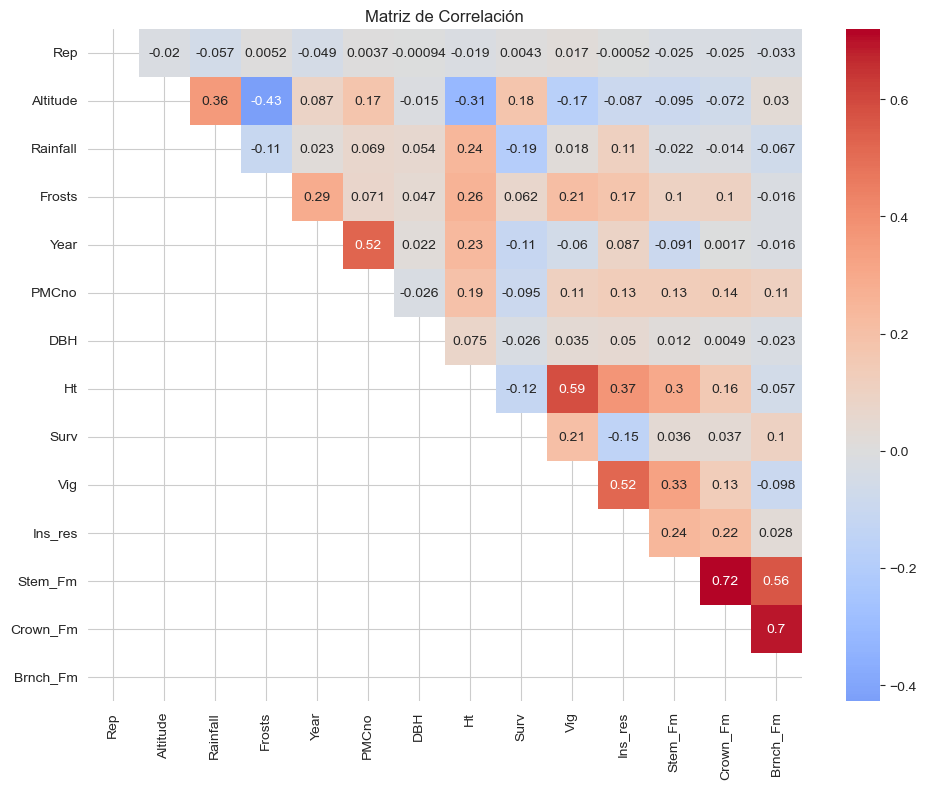

Ejercicio de Clasificación


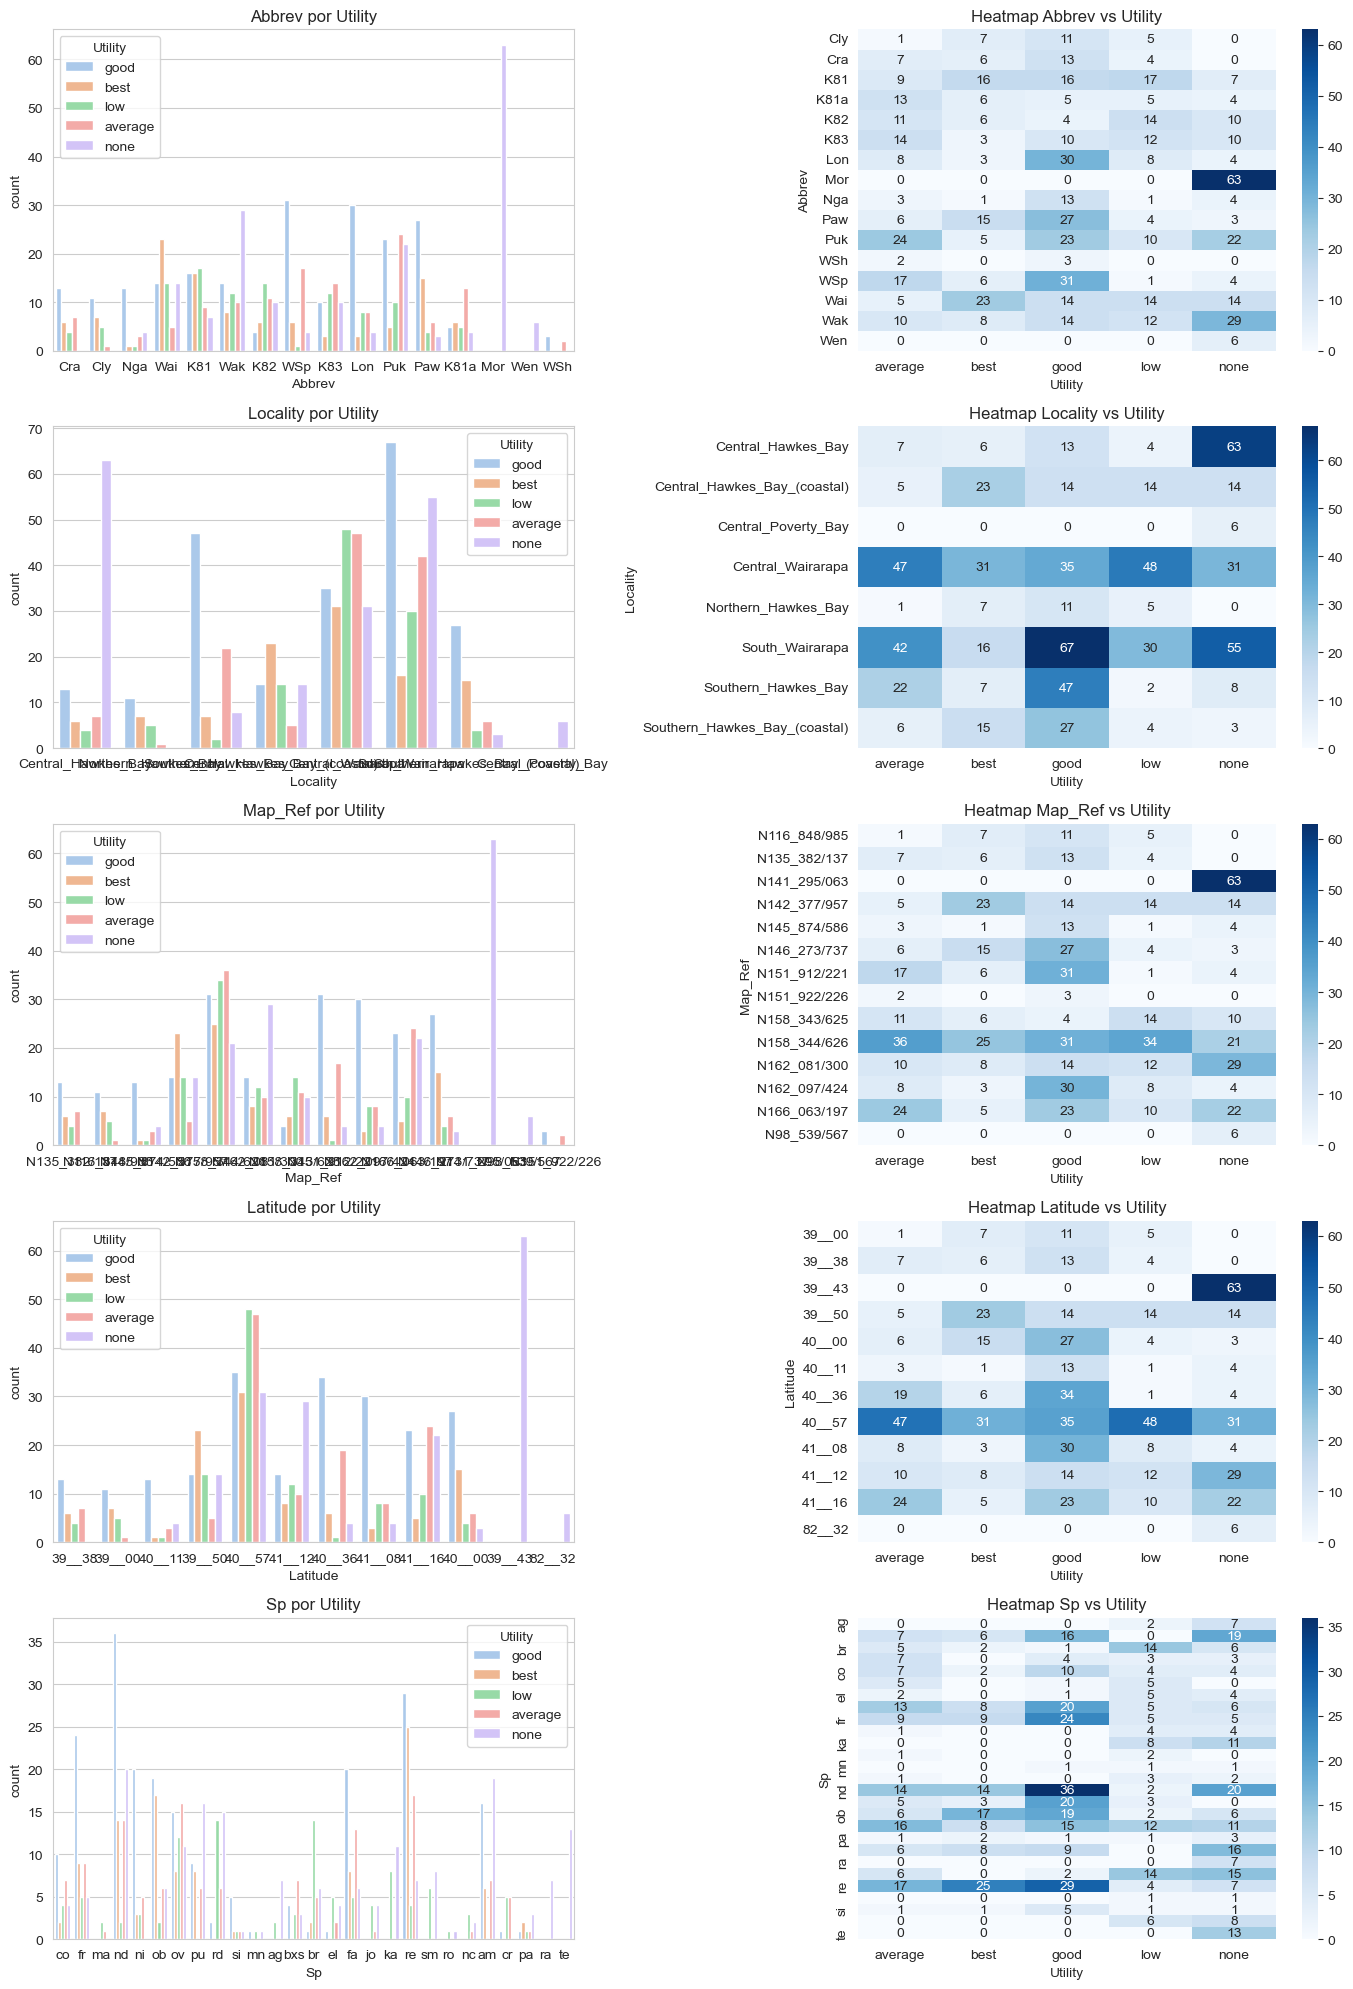

C:\Users\Centinela\AppData\Local\Temp\ipykernel_9912\3502138609.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=label,y=col,data=df,palette="pastel",ax=axes[i][1])
C:\Users\Centinela\AppData\Local\Temp\ipykernel_9912\3502138609.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=label,y=col,data=df,palette="pastel",ax=axes[i][1])
C:\Users\Centinela\AppData\Local\Temp\ipykernel_9912\3502138609.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=label,y=col,data=df,palette="pastel",ax=axes[i][1])
C:\Users\Centinela\AppData\Loca

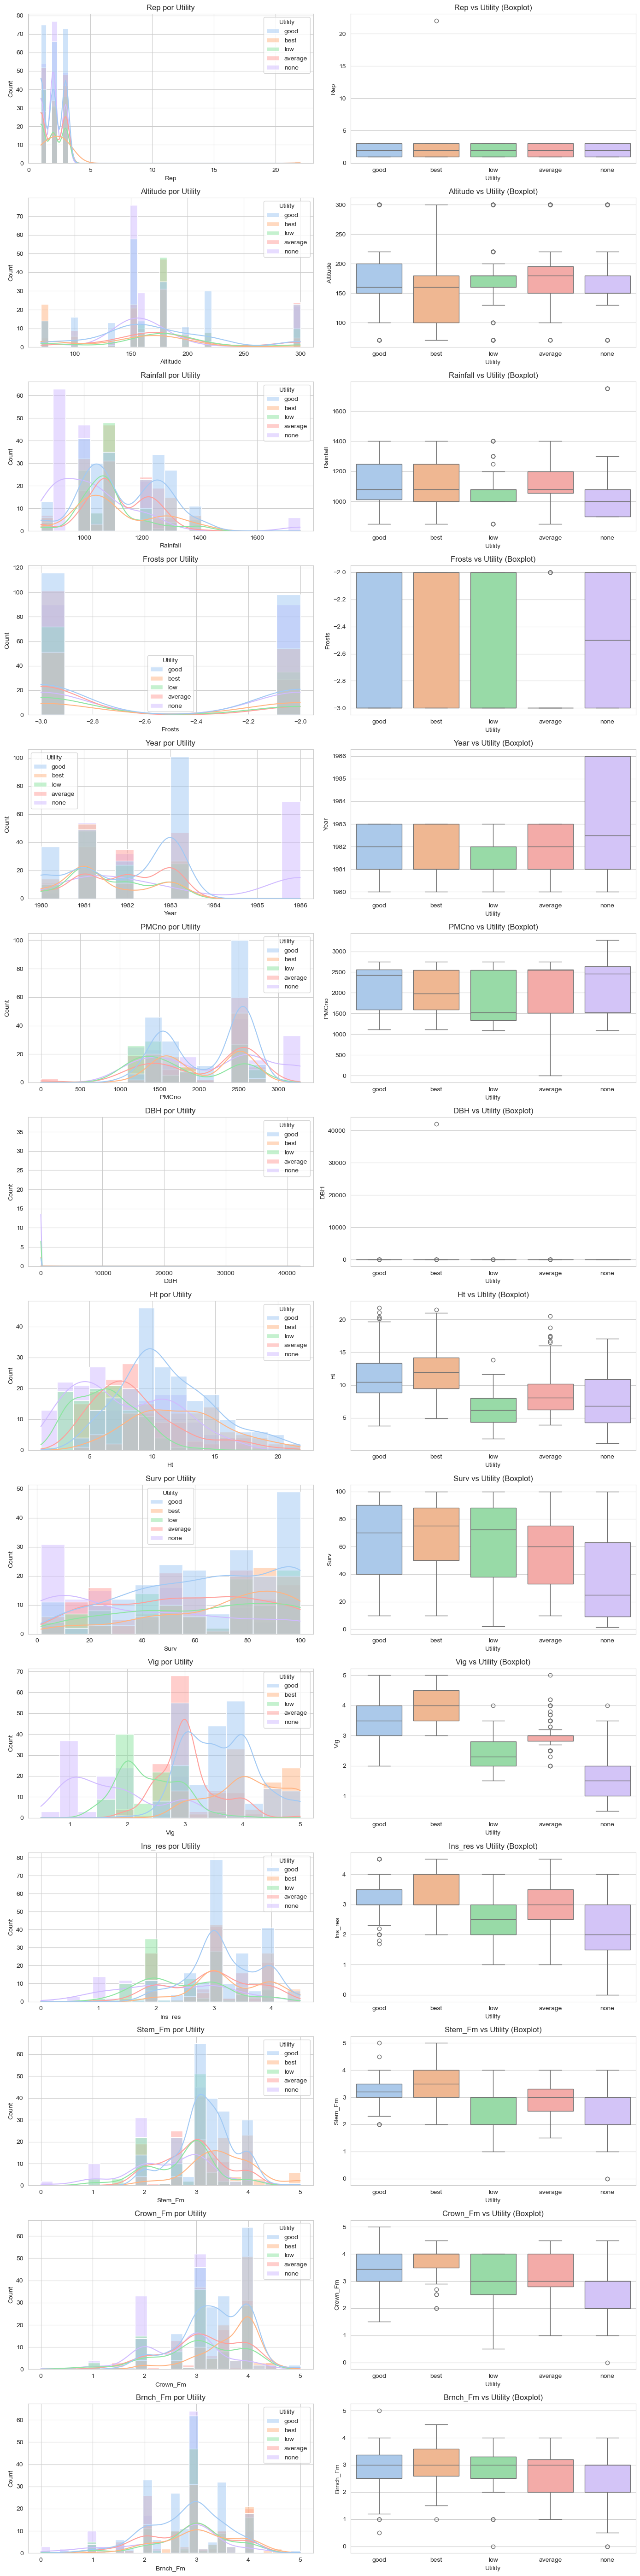

In [82]:
bivariate_visualizations(df_eucalyptus, 'Utility')

Punto 5

In [ ]:
def trivariate_visualizations(df, label):

    A, B = get_column_types(df)
    atributos_num = [col for col in A if col != label]
    combinaciones = list(itertools.combinations(atributos_num, 2))

    # Identificación del tipo de problema
    if label in A:
        tipo = "Regresión"
    elif label in B:
        tipo = "Clasificación"
    else:
        return

    # Para optimizar la visualialización de las gráficas
    for i in range(0, len(combinaciones), 4):

        fig, axes = plt.subplots(1, 4, figsize=(18, 5))
        axes = axes.flatten()  # convertir matriz 1 x 4 en un array de 4 elementos

        bloque = combinaciones[i:i+4] # Defino los bloques, tomo solo 4 combinaciones para cada fila

        for j, (col1, col2) in enumerate(bloque):

            if tipo == "Regresión":

                scatter = axes[j].scatter(df[col1],df[col2],c=df[label],cmap="viridis",alpha=0.6)        

                fig.colorbar(scatter, ax=axes[j])
                axes[j].set_title(f"{col1} vs {col2} por {label}")

            elif tipo == "Clasificación":

                sns.scatterplot(x=col1,y=col2,hue=label,data=df,palette="viridis",alpha=0.6,ax=axes[j])
                axes[j].set_title(f"{col1} vs {col2} por {label}")

        # Ocultar espacios vacíos Si el último bloque tiene solo 1, 2 o 3gráficos:
        for k in range(len(bloque), 4):
            axes[k].set_visible(False)

        plt.tight_layout()
        plt.show()


In [ ]:
trivariate_visualizations(df_eucalyptus, 'Utility')

In [ ]:
trivariate_visualizations(df_boston, 'medv')

Punto 6

In [86]:
def multivariate_analysis(df, label):

    A, B = get_column_types(df)
    atributos_num = [col for col in A if col != label]

    if len(atributos_num) < 2:
        print("No hay suficientes variables numéricas para análisis multivariado.")
        return

    # Boxplot multivariado
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[atributos_num], palette="pastel", linewidth=1.2,fliersize=3) # Dibujo el boxplot para todas las columnas numéricas en un mismo gráfico
    plt.title("Boxplot multivariado")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Mensaje decisión si se normaliza o no
    
    min_desviacion = df[atributos_num].std().min()
    max_desviacion = df[atributos_num].std().max()
    indice = max_desviacion / min_desviacion
    if indice > 5:
        print(f"Se recomienda normalizar las variables numéricas debido a que tienen escalas diferentes")
    else:
        print(f"No es necesario normalizar las variables numéricas debido a que tienen escalas similares.")

    # Para usar PCA debo separar las variables numéricas

    df_limpio = df[atributos_num + [label]].dropna()

    X = df_limpio[atributos_num]
    print("Shape de X:", X.shape)
    y = df_limpio[label]   # Elimino filas con valores nulos para PCA

    # Escalo los datos
    
    
    scaler = StandardScaler()
    datos_escalados = scaler.fit_transform(X)

    # PCA 2 COMPONENTES

    pca_2 = PCA(n_components=2)
    componentes_principales_2 = pca_2.fit_transform(datos_escalados)

    # Varianza explicada con 2 componentes
    varianza_explicada_2 = pca_2.explained_variance_ratio_.sum()
    print(f"Varianza explicada con 2 componentes: {varianza_explicada_2:.2f}")

    # Visualización 2 componentes principales
    plt.figure(figsize=(10, 6))

    if label in A:  # Regresión

        scatter = plt.scatter(componentes_principales_2[:, 0],componentes_principales_2[:, 1],c=y,cmap="viridis",alpha=0.6)
        plt.colorbar(scatter, label=label)
        plt.title("PCA - 2 Componentes Principales (Regresión)")

    else:  # Clasificación

        sns.scatterplot(x=componentes_principales_2[:, 0],y=componentes_principales_2[:, 1],hue=y,palette="Set2")
        plt.title("PCA - 2 Componentes Principales (Clasificación)")

    plt.show()


    # PCA 3 COMPONENTES
    pca_3 = PCA(n_components=3)
    componentes_principales_3 = pca_3.fit_transform(datos_escalados)

    # Varianza explicada con 3 componentes
    varianza_explicada_3 = pca_3.explained_variance_ratio_.sum()
    print(f"Varianza explicada con 3 componentes: {varianza_explicada_3:.2f}")

    # Visualización 3 componentes principales
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    if label in A:

        scatter = ax.scatter(
            componentes_principales_3[:,0],componentes_principales_3[:,1],componentes_principales_3[:,2],c=y,cmap="viridis")
        fig.colorbar(scatter)

    else:

        for clase in y.unique():
            indices = y == clase
            ax.scatter(componentes_principales_3[indices,0],componentes_principales_3[indices,1],componentes_principales_3[indices,2],label=clase)
        ax.legend()

    ax.set_title("PCA 3D")
    plt.show()

    # LDA

    # Sólo aplica para clasificación, por lo que sólo se ejecutará si la variable objetivo es categórica
    if label in B:
        n_clases = y.nunique()
        componentes_max= min(3, n_clases - 1)  # LDA no puede tener más componentes que clases - 1

        for n in range(1, componentes_max + 1):

            lda = LinearDiscriminantAnalysis(n_components=n)
            componentes_lda = lda.fit_transform(datos_escalados, y)
            print(f"\nLDA con {n} componente(s):")   

            # Visualización LDA

            if n ==1:
                plt.figure(figsize=(8,5))
                sns.scatterplot(x=componentes_lda[:,0],y=[0]*len(componentes_lda),hue=y,palette="Set2",alpha=0.6)
                plt.yticks([])  # Ocultar eje y
                plt.title(f"LDA - {n} Componente(s)")
                plt.show()

            elif n == 2:
                plt.figure(figsize=(10,6))
                sns.scatterplot(x=componentes_lda[:,0],y=componentes_lda[:,1],hue=y,palette="Set2",alpha=0.6)
                plt.title(f"LDA - {n} Componente(s)")
                plt.show()

            elif n == 3:
                fig = plt.figure()
                ax = fig.add_subplot(111, projection='3d')
                for clase in y.unique():
                    indices = y == clase
                    ax.scatter(componentes_lda[indices,0],componentes_lda[indices,1],componentes_lda[indices,2],label=clase)

                ax.legend()
                ax.set_title("LDA - 3 Componentes")
                plt.show()


    

In [ ]:
multivariate_analysis(df_boston, 'medv')

In [ ]:
multivariate_analysis(df_eucalyptus, 'Utility')

Punto 7

In [104]:
def full_eda(df, label):

    print("ANÁLISIS EXPLORATORIO COMPLETO")

    # 1️. información DE Nulos
    print("1. Información de los nulos")
    visualize_missing_values(df)

    # 2 Separación de columnas tipo número y tipo objeto
    print("2. Separación de columnas tipo número y tipo objeto")
    A, B =get_column_types(df)
    print("Columnas numéricas:", A)
    print("Columnas categóricas:", B)

    # 3️ Conocimiento de la variable Objetivo
    print("3. Conocimiento de la variable Objetivo")
    visualize_target(df, label)

    # 4️ Visualización de atributos contra la variable objetivo
    print("4.1 Se llamará ésta función en el siguiente punto")

    # 4.2 Matriz de correlación y llamada a visualize_attributes_against_target(df, label)
    print("4.2 Matriz de correlación y llamada a visualize_attributes_against_target(df, label)")
    bivariate_visualizations(df, label)

    # 5 Análisis de trivariado 
    print("5. Análisis de trivariado")
    trivariate_visualizations(df, label)

    # 6 Análisis multivariado, PCA y LDA (Si aplica)
    print("6. Análisis multivariado, PCA y LDA (Si aplica)")
    multivariate_analysis(df, label)

In [77]:
# Cargar datasets
df_iris_discretizado = pd.read_csv('iris_discretized.csv')
df_boston_discretizado = pd.read_csv('boston_discretized.csv')

In [100]:
get_column_types(df_iris_discretizado)

([], ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

ANÁLISIS EXPLORATORIO COMPLETO
1. Información de los nulos


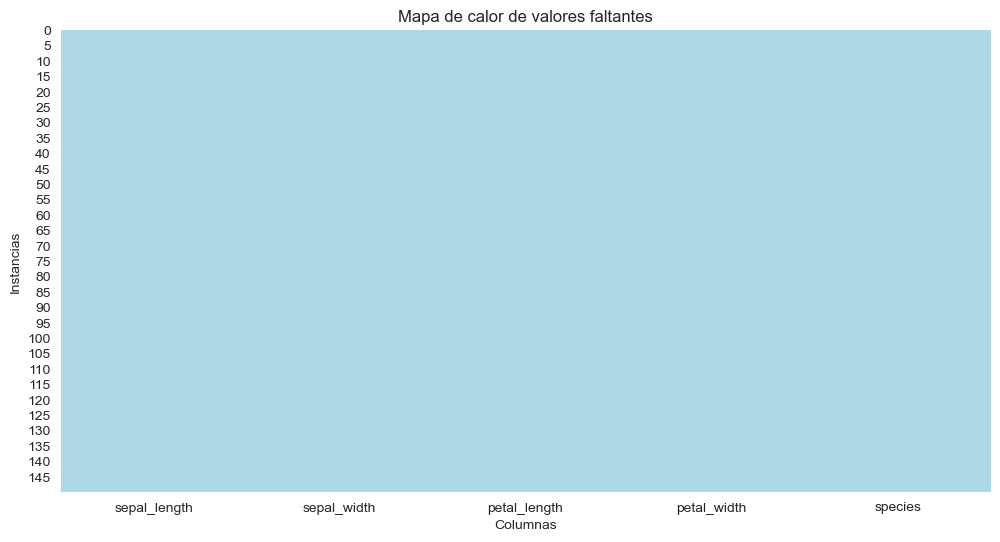

2. Separación de columnas tipo número y tipo objeto
Columnas numéricas: []
Columnas categóricas: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
3. Conocimiento de la variable Objetivo
Ejercicio de Clasificacion


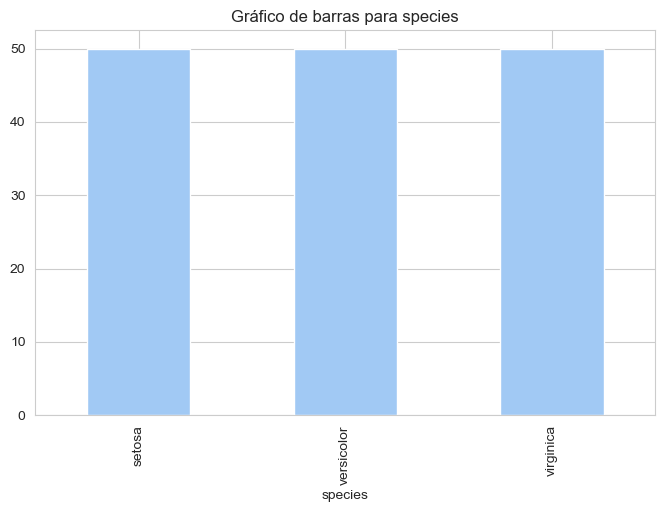

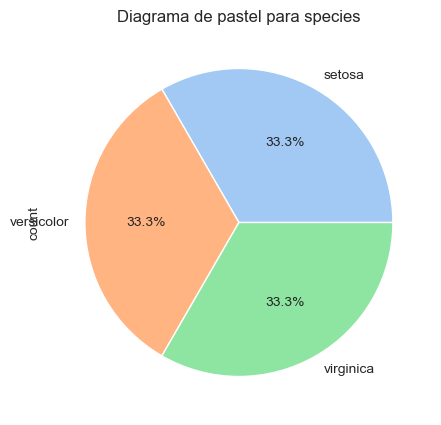

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64
4.1 Se llamará ésta función en el siguiente punto
4.2 Matriz de correlación y llamada a visualize_attributes_against_target(df, label)
No hay suficientes columnas numéricas para calcular correlación.
Ejercicio de Clasificación


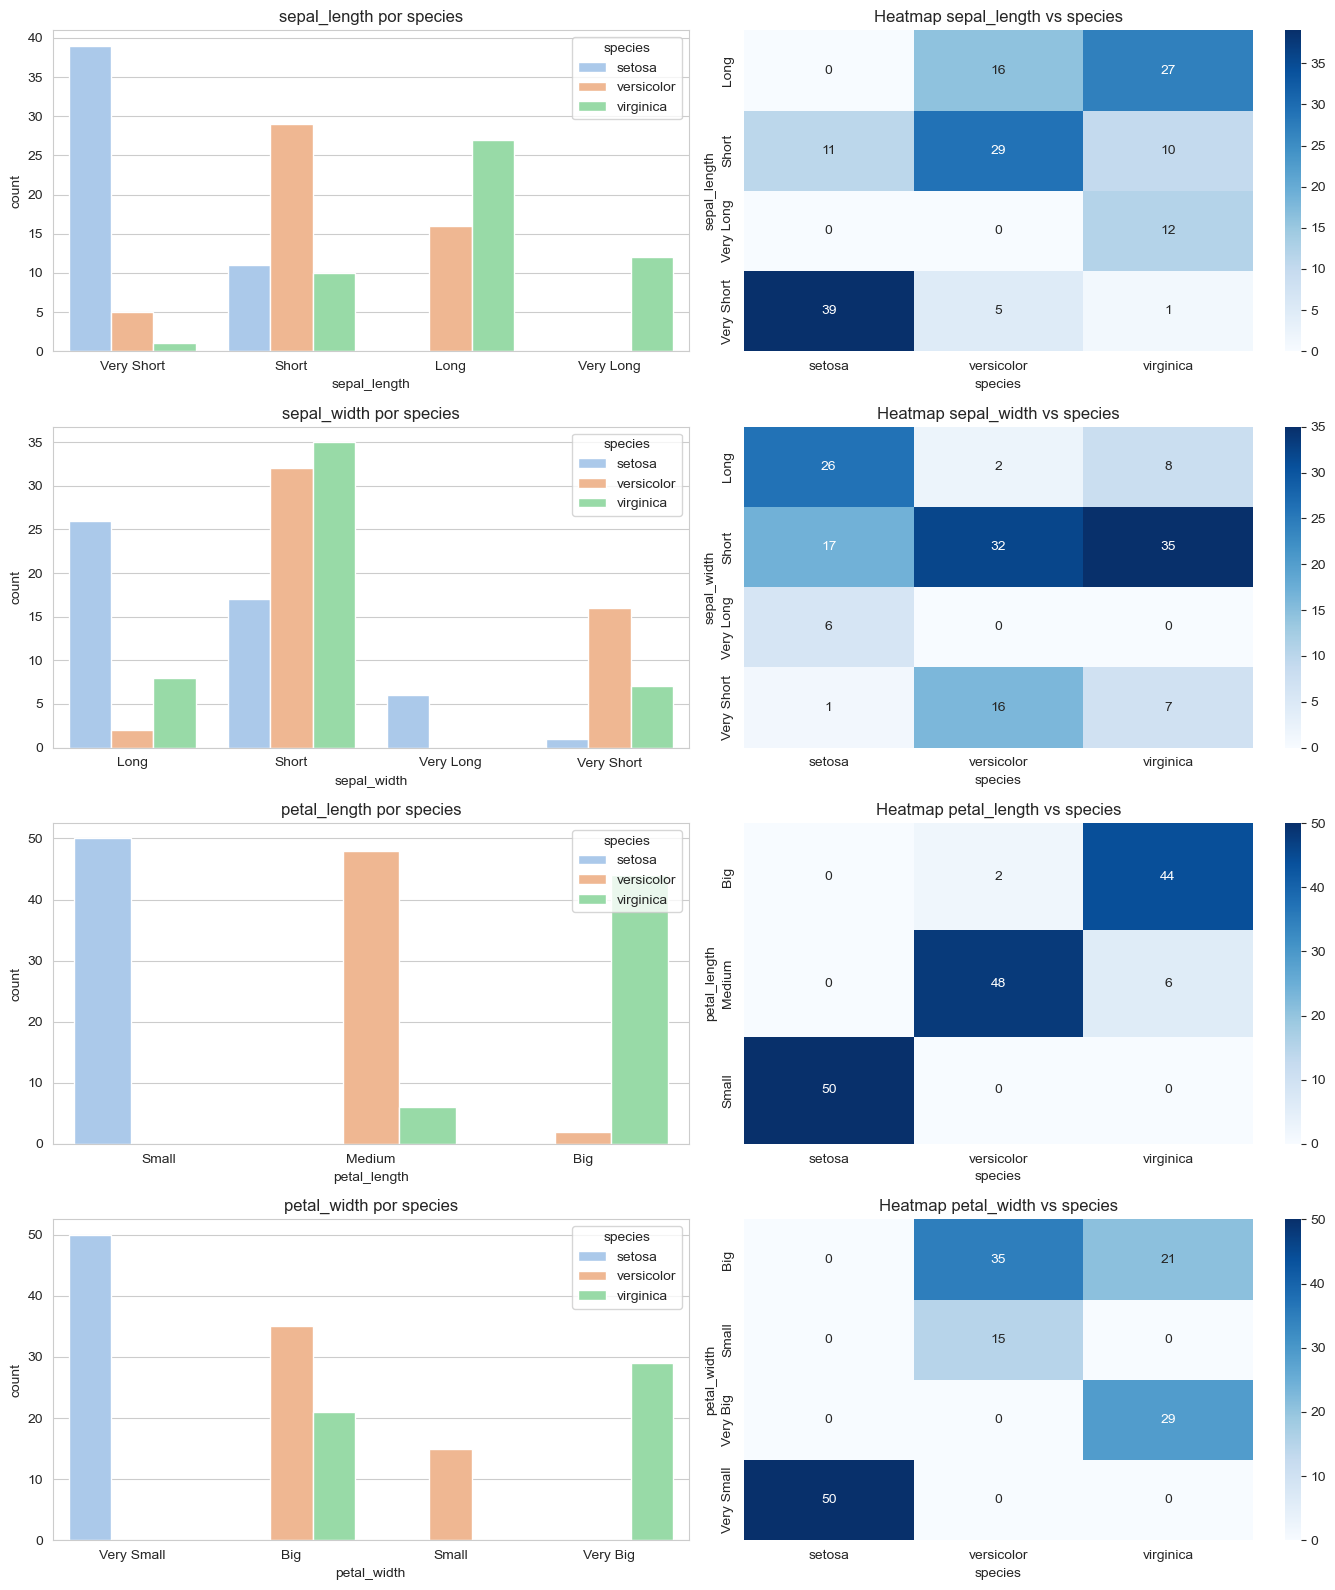

5. Análisis de trivariado
6. Análisis multivariado, PCA y LDA (Si aplica)
No hay suficientes variables numéricas para análisis multivariado.


In [105]:
# Aplicar EDA completo a Iris Discretizado
full_eda(df_iris_discretizado, 'species')

ANÁLISIS EXPLORATORIO COMPLETO
1. Información de los nulos


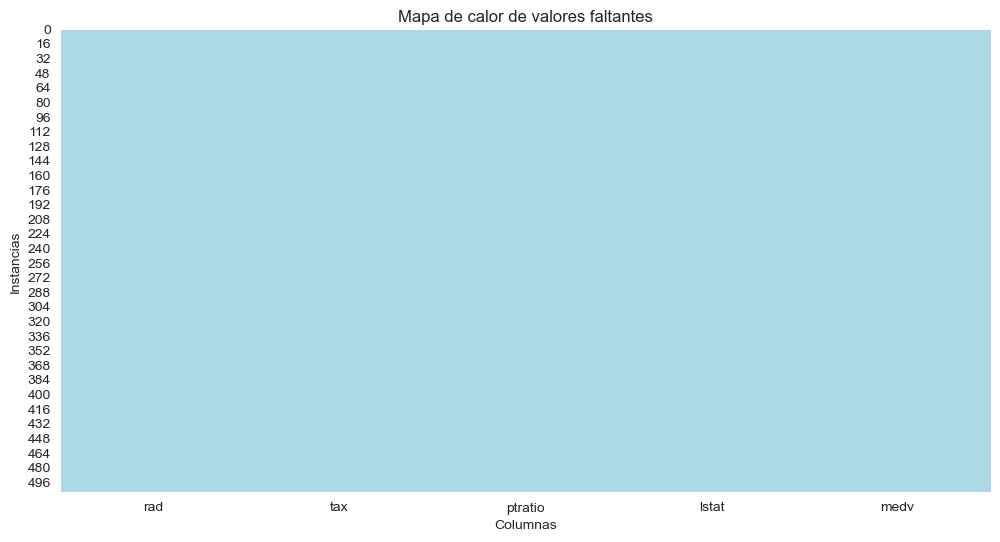

2. Separación de columnas tipo número y tipo objeto
Columnas numéricas: ['medv']
Columnas categóricas: ['rad', 'tax', 'ptratio', 'lstat']
3. Conocimiento de la variable Objetivo
Ejercicio de Regresion


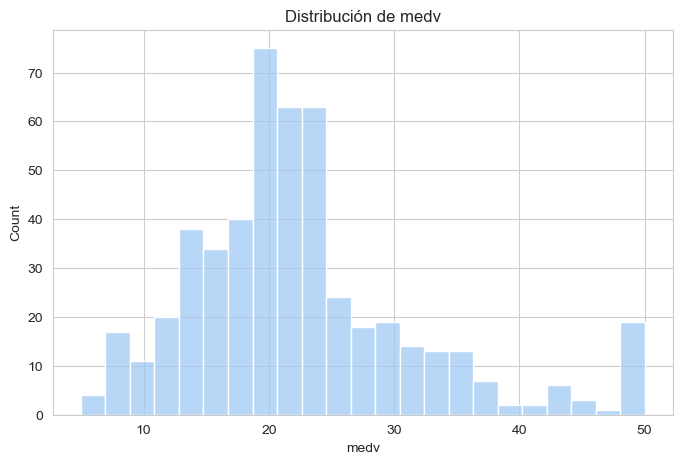

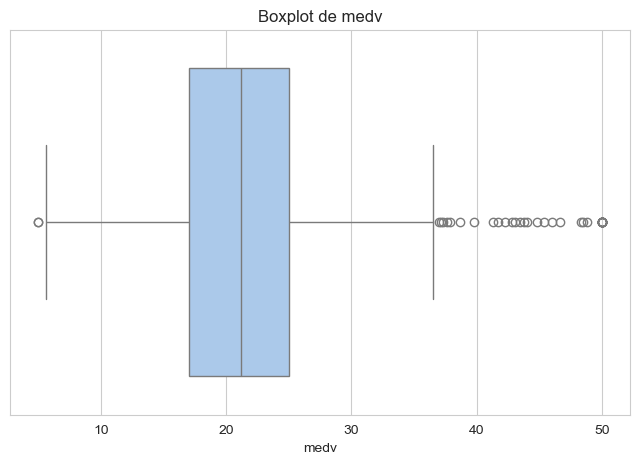

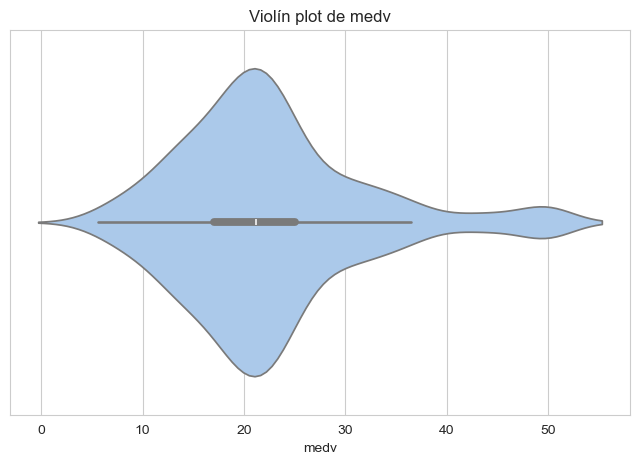

4.1 Se llamará ésta función en el siguiente punto
4.2 Matriz de correlación y llamada a visualize_attributes_against_target(df, label)
No hay suficientes columnas numéricas para calcular correlación.
Ejercicio de Regresión


C:\Users\Centinela\AppData\Local\Temp\ipykernel_9912\3502138609.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=label,data=df,ax=axes[i][0],palette="pastel")
C:\Users\Centinela\AppData\Local\Temp\ipykernel_9912\3502138609.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=col, y=label,data=df,ax=axes[i][1],palette="pastel")
C:\Users\Centinela\AppData\Local\Temp\ipykernel_9912\3502138609.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=label,data=df,ax=axes[i][0],palette="pastel")
C:\Users\Centinela\AppData\L

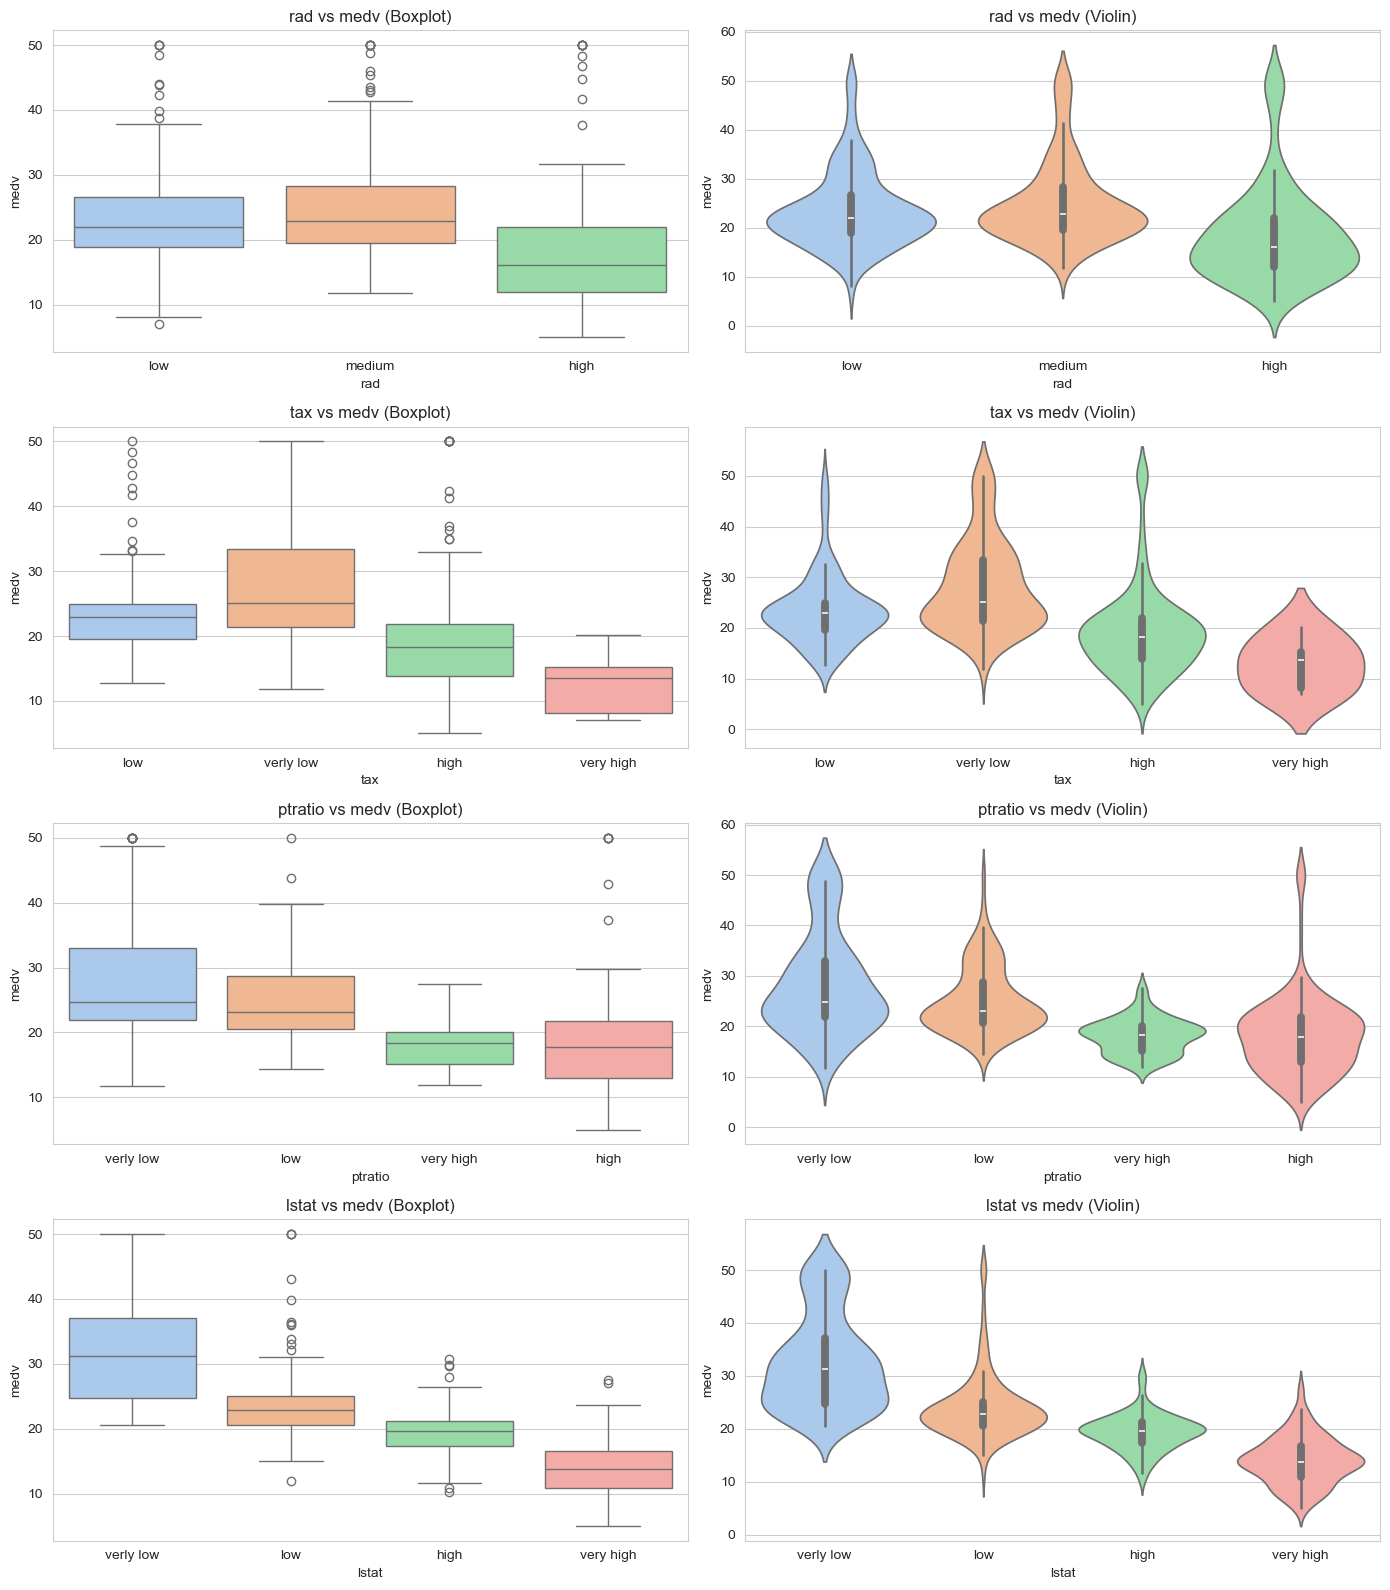

5. Análisis de trivariado
6. Análisis multivariado, PCA y LDA (Si aplica)
No hay suficientes variables numéricas para análisis multivariado.


In [106]:
# Aplicar EDA completo a Boston Discretizado
full_eda(df_boston_discretizado, 'medv')

In [107]:
# Cargar dataset Bank Customer Churn
df_bank = pd.read_csv('bank_customer_churn.csv')

ANÁLISIS EXPLORATORIO COMPLETO
1. Información de los nulos


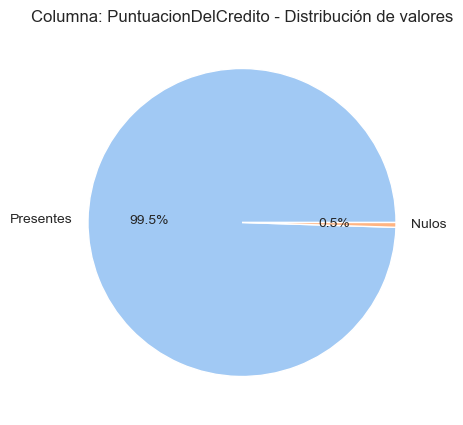

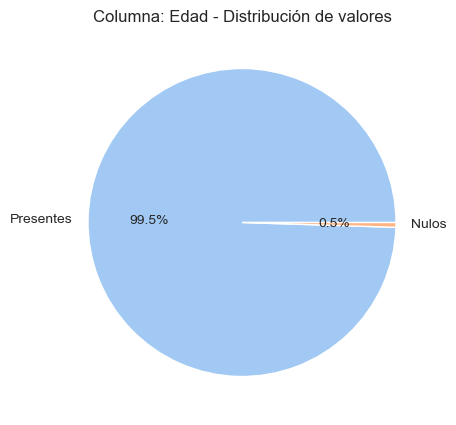

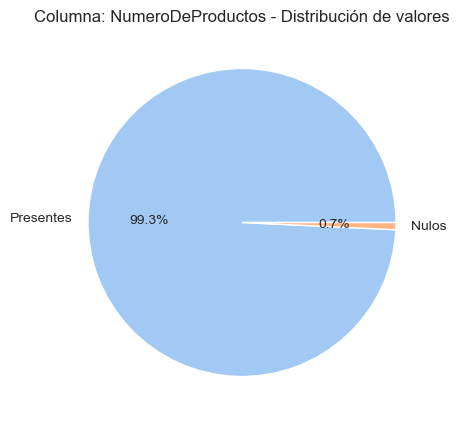

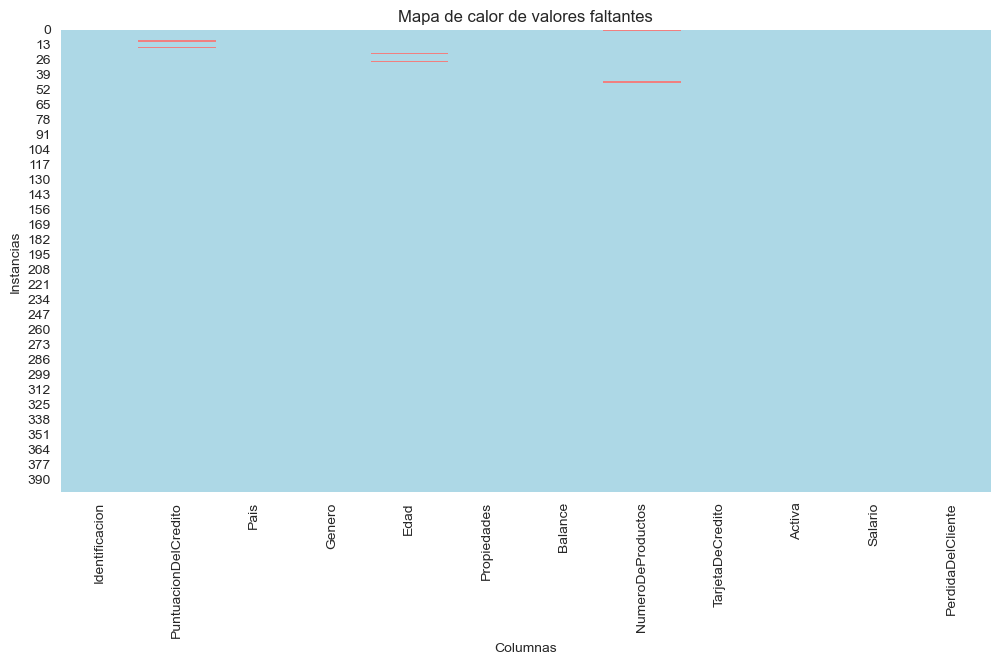

2. Separación de columnas tipo número y tipo objeto
Columnas numéricas: ['Identificacion', 'PuntuacionDelCredito', 'Edad', 'Propiedades', 'Balance', 'NumeroDeProductos', 'Salario']
Columnas categóricas: ['Pais', 'Genero', 'TarjetaDeCredito', 'Activa', 'PerdidaDelCliente']
3. Conocimiento de la variable Objetivo
Ejercicio de Clasificacion


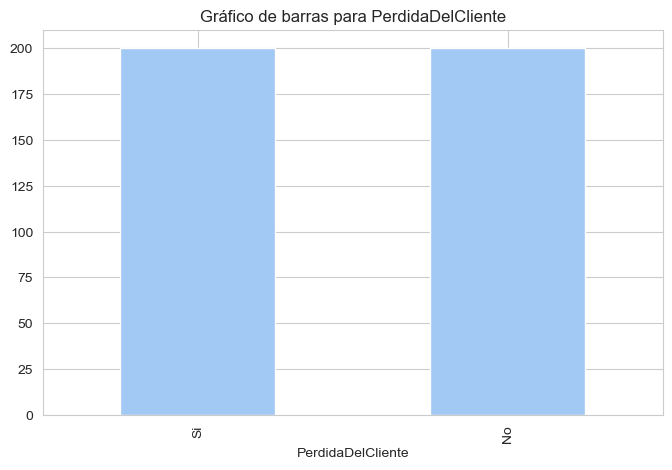

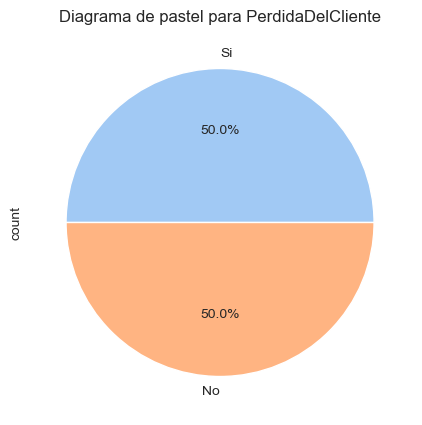

PerdidaDelCliente
Si    200
No    200
Name: count, dtype: int64
4.1 Se llamará ésta función en el siguiente punto
4.2 Matriz de correlación y llamada a visualize_attributes_against_target(df, label)


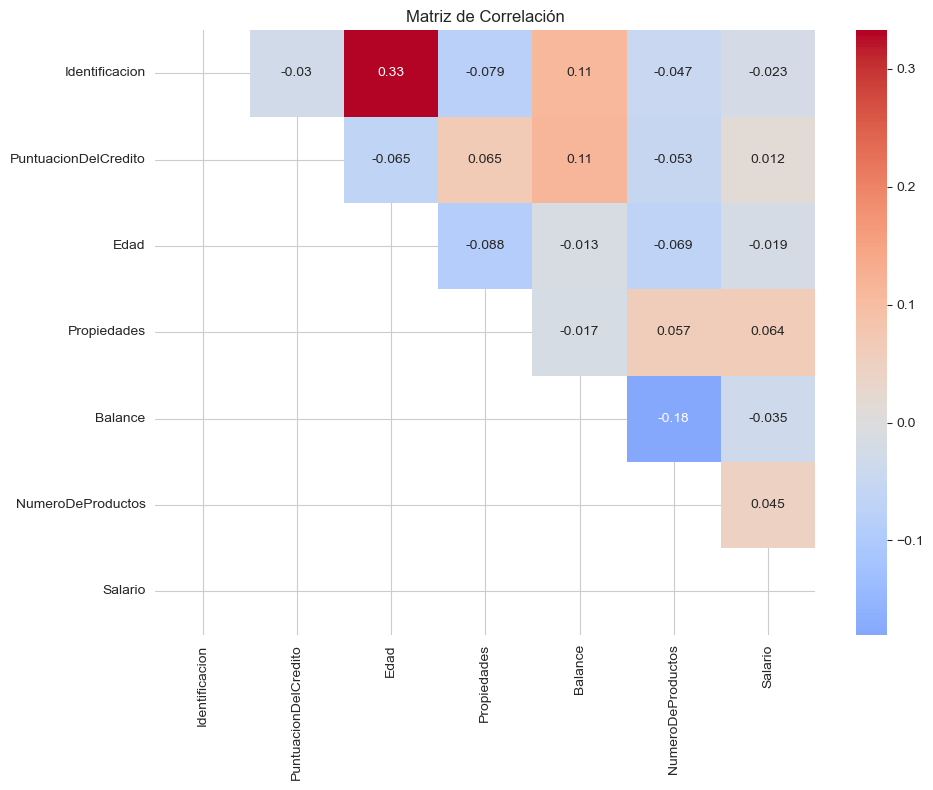

Ejercicio de Clasificación


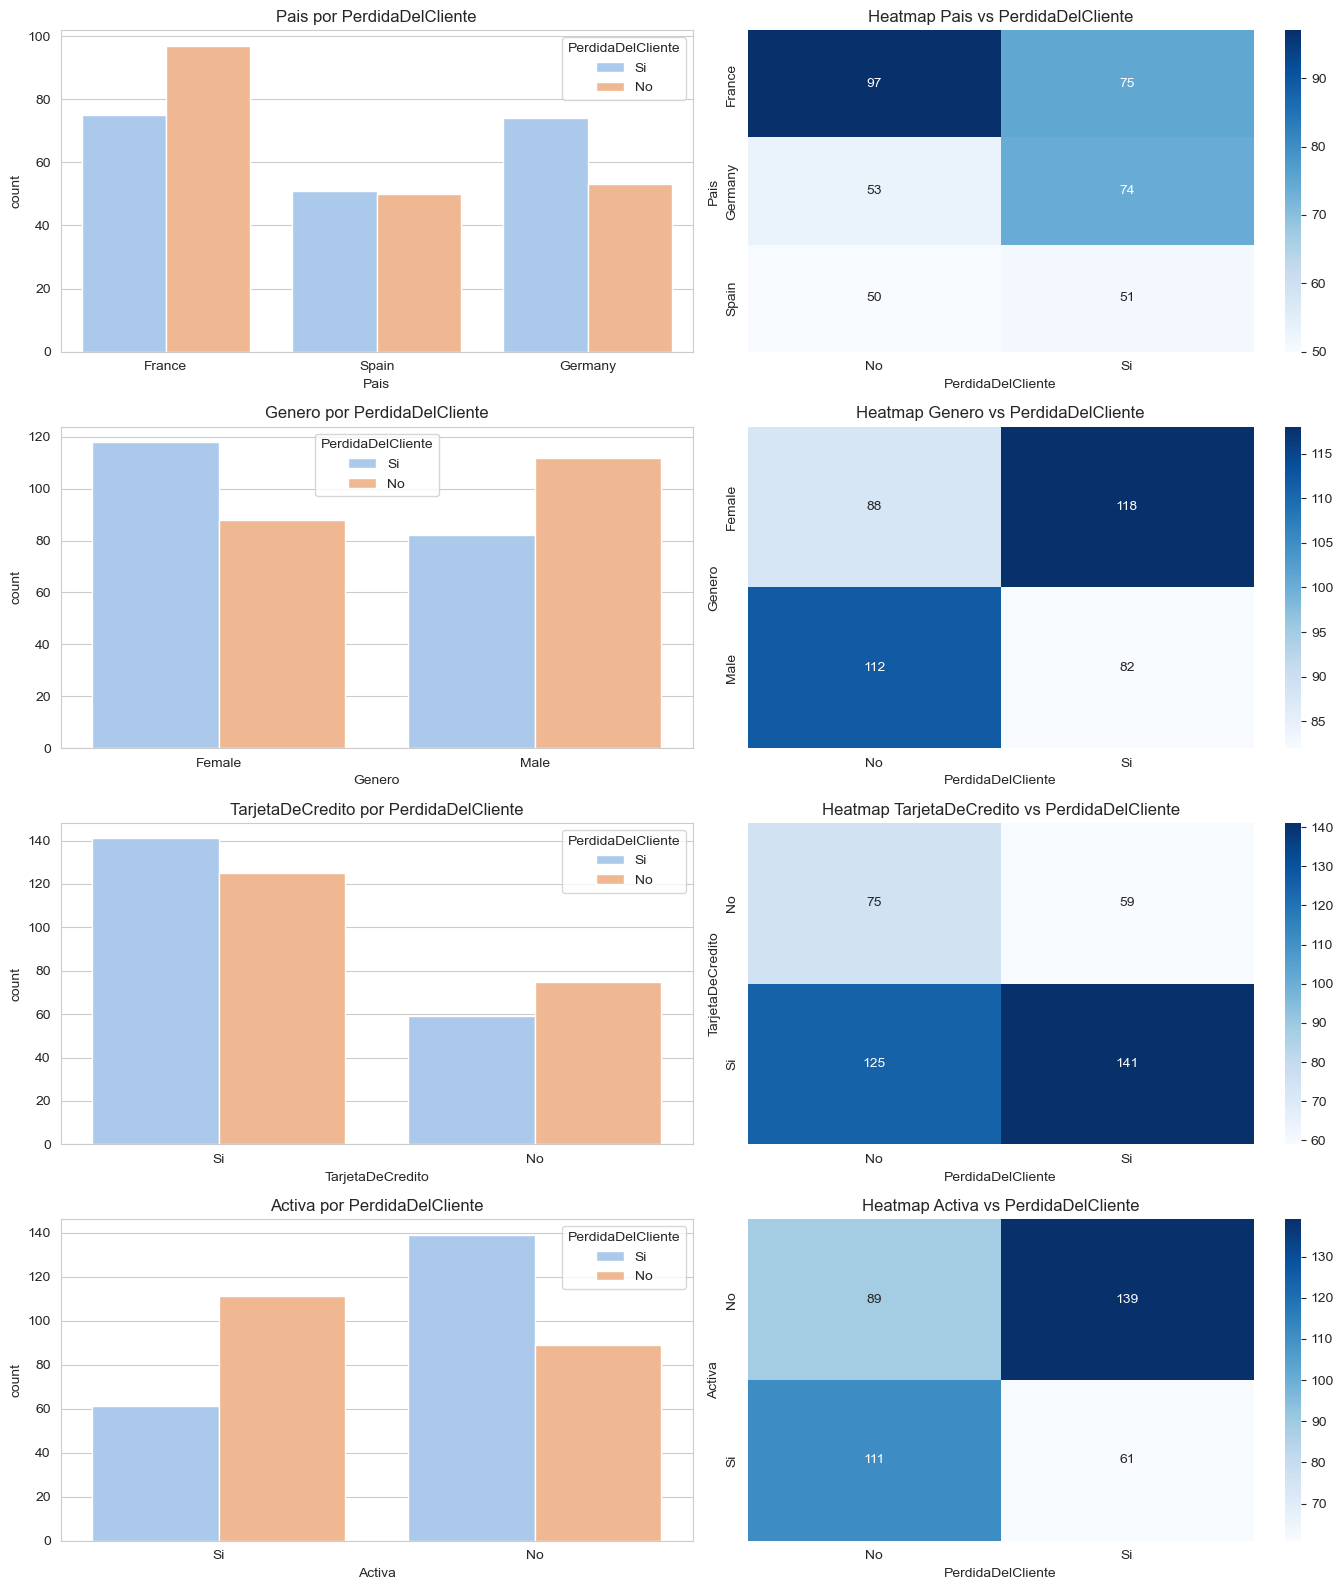

C:\Users\Centinela\AppData\Local\Temp\ipykernel_9912\3502138609.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=label,y=col,data=df,palette="pastel",ax=axes[i][1])
C:\Users\Centinela\AppData\Local\Temp\ipykernel_9912\3502138609.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=label,y=col,data=df,palette="pastel",ax=axes[i][1])
C:\Users\Centinela\AppData\Local\Temp\ipykernel_9912\3502138609.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=label,y=col,data=df,palette="pastel",ax=axes[i][1])
C:\Users\Centinela\AppData\Loca

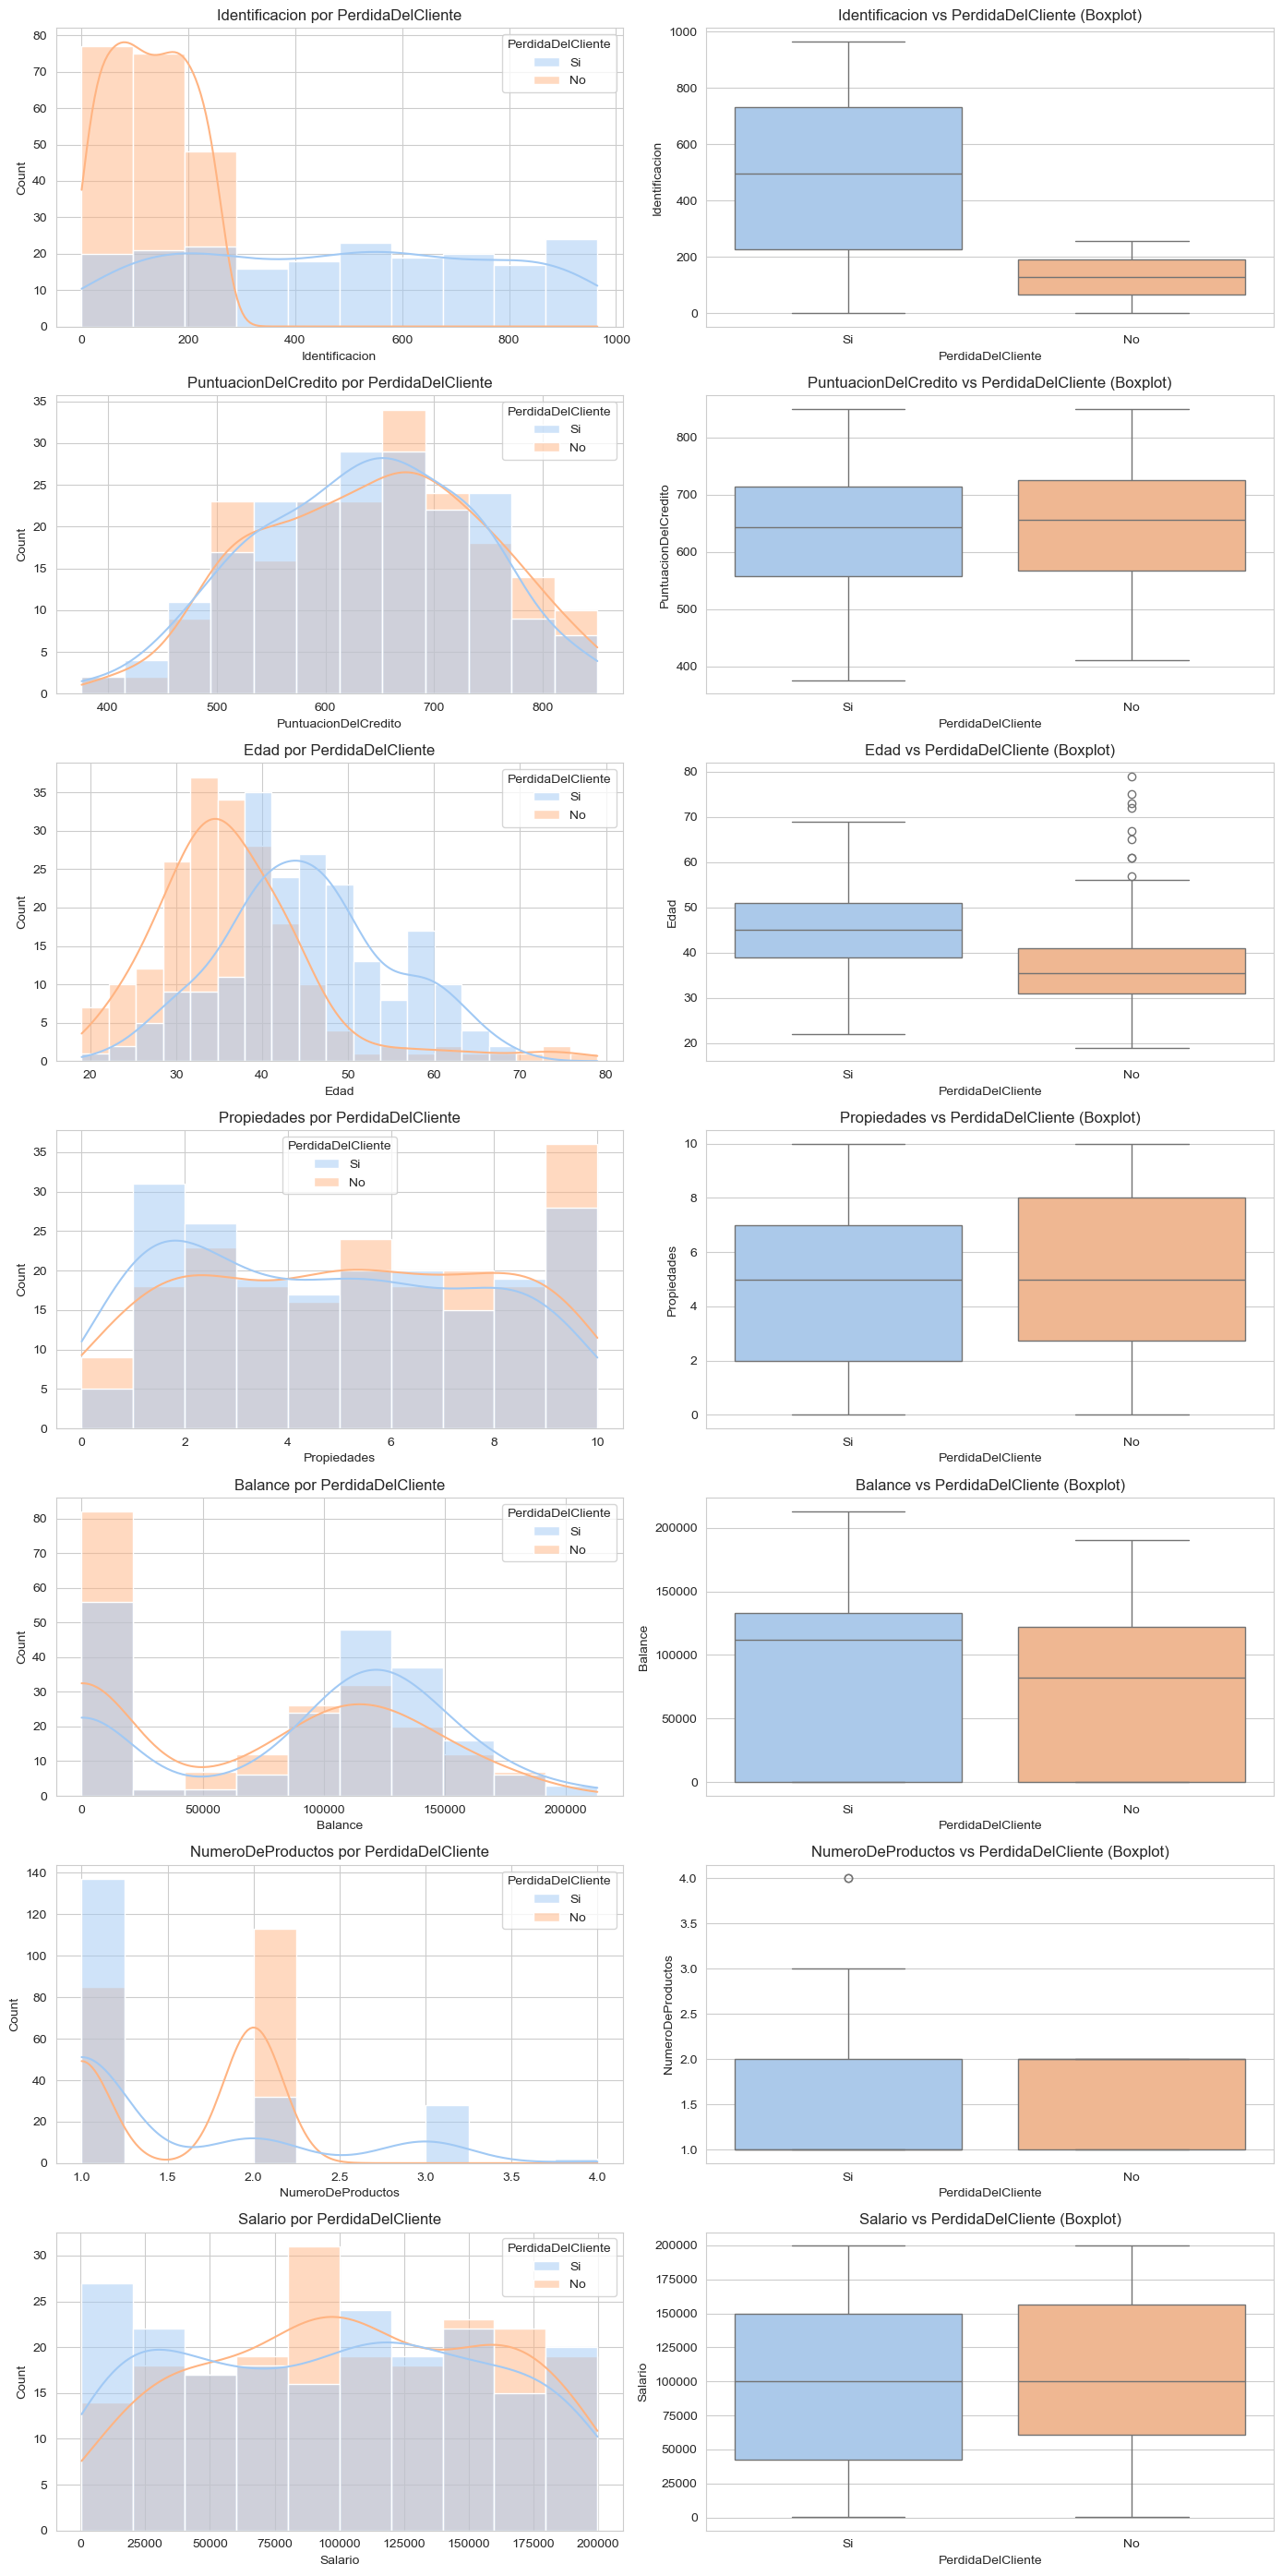

5. Análisis de trivariado


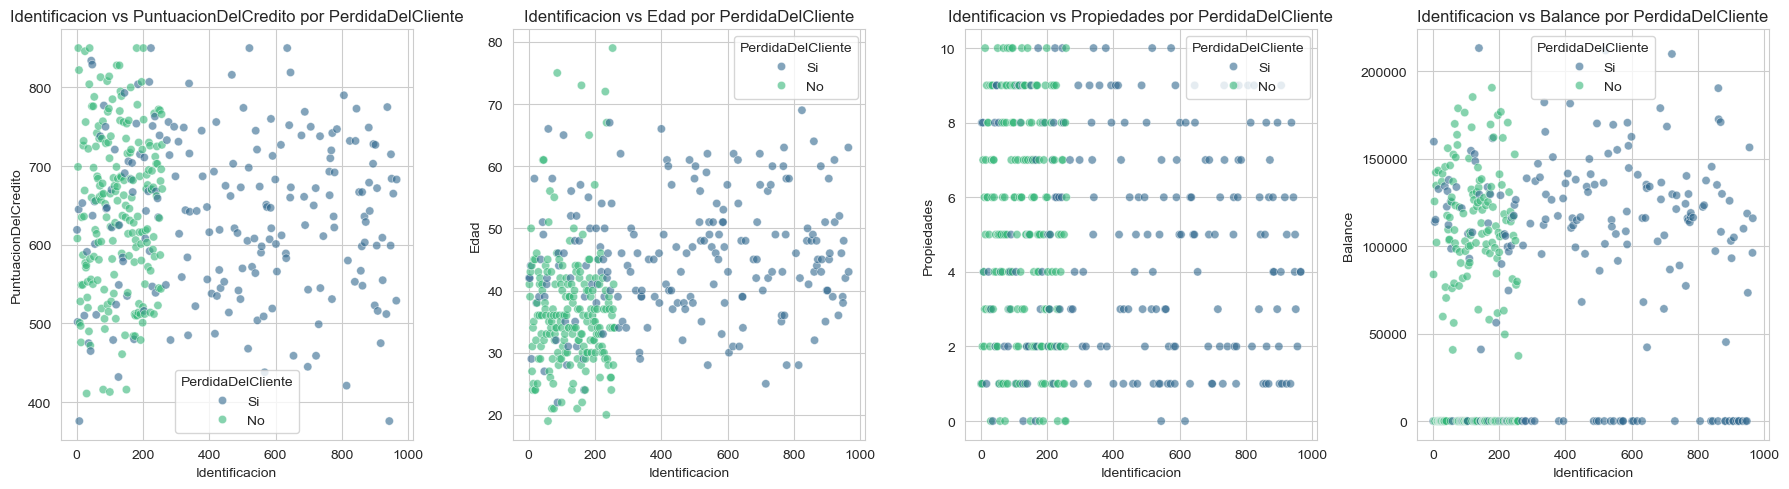

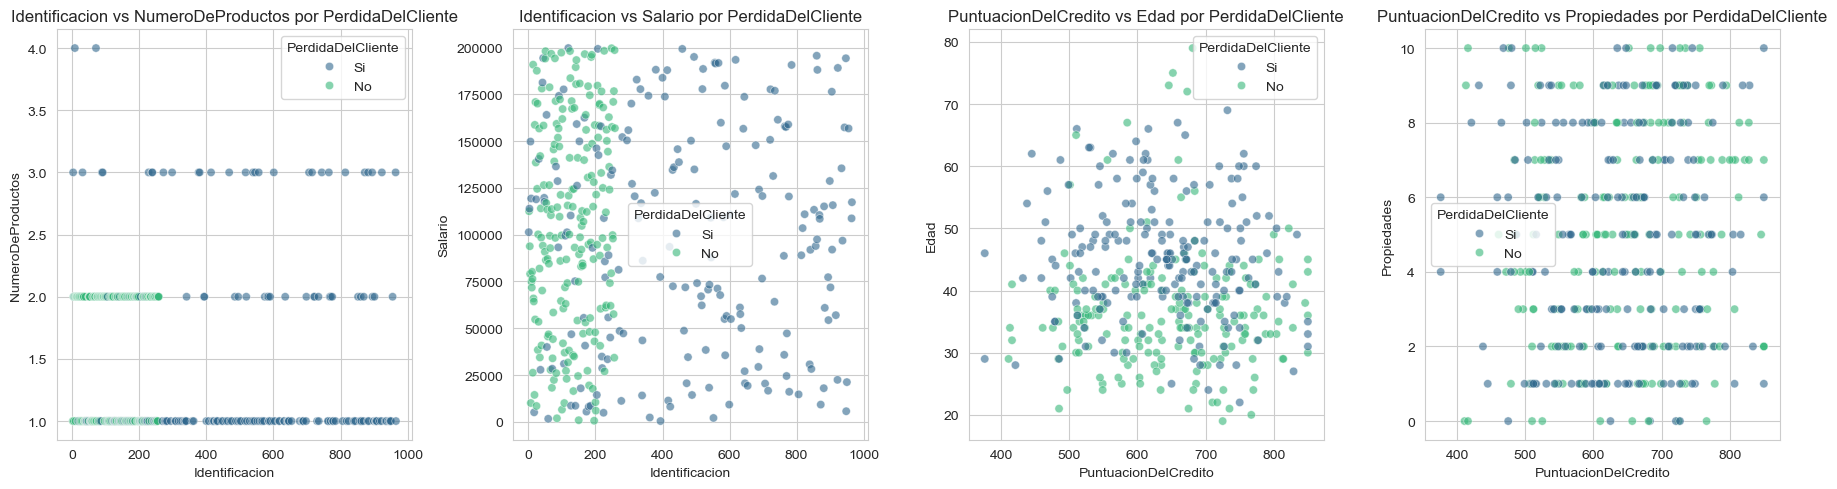

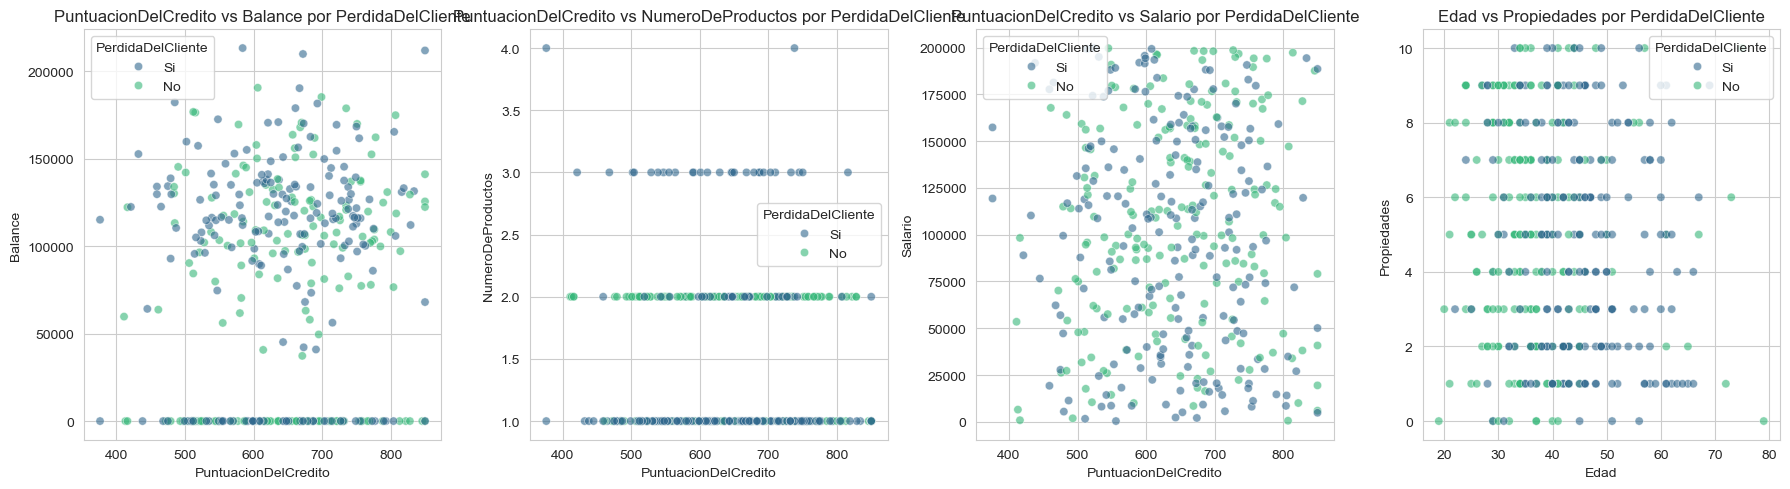

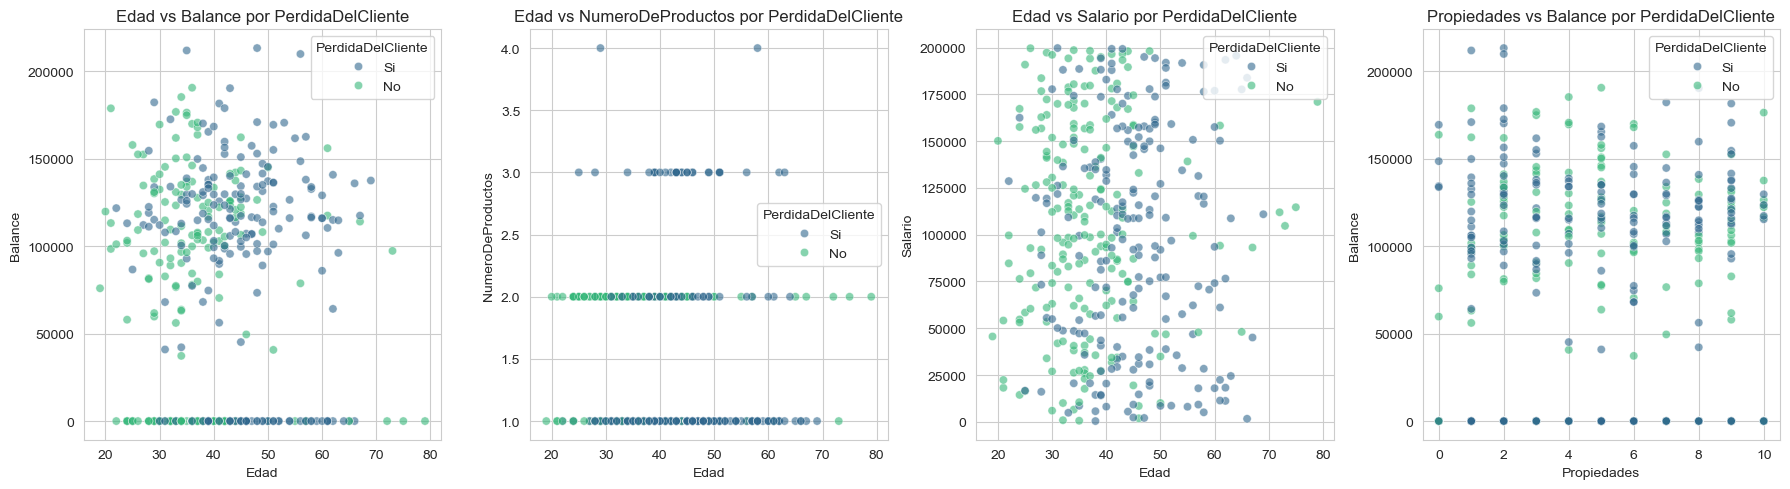

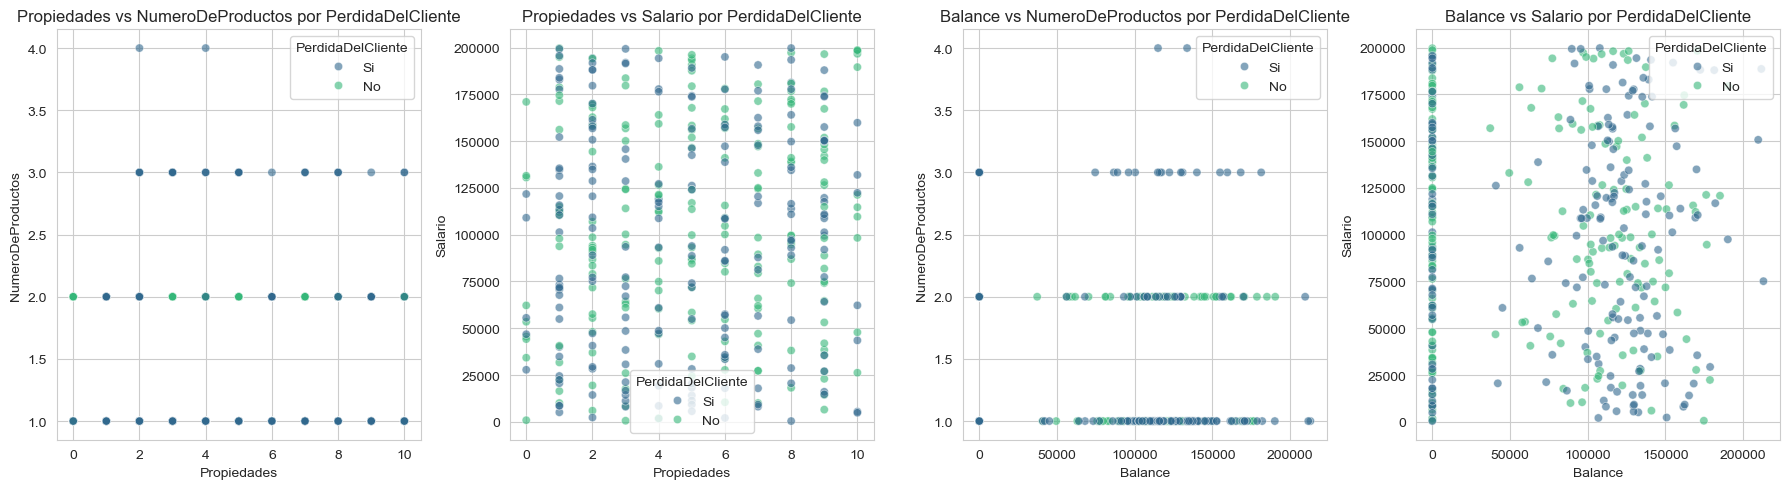

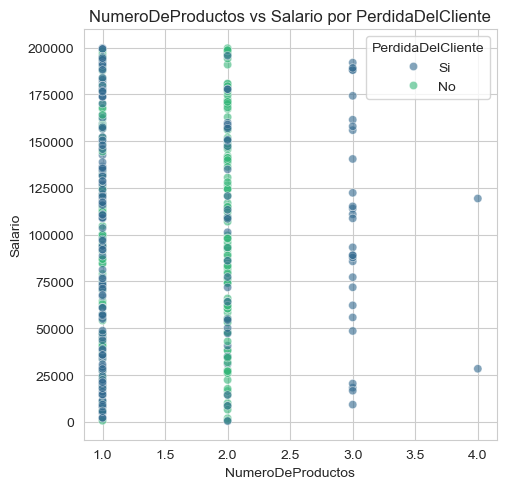

6. Análisis multivariado, PCA y LDA (Si aplica)


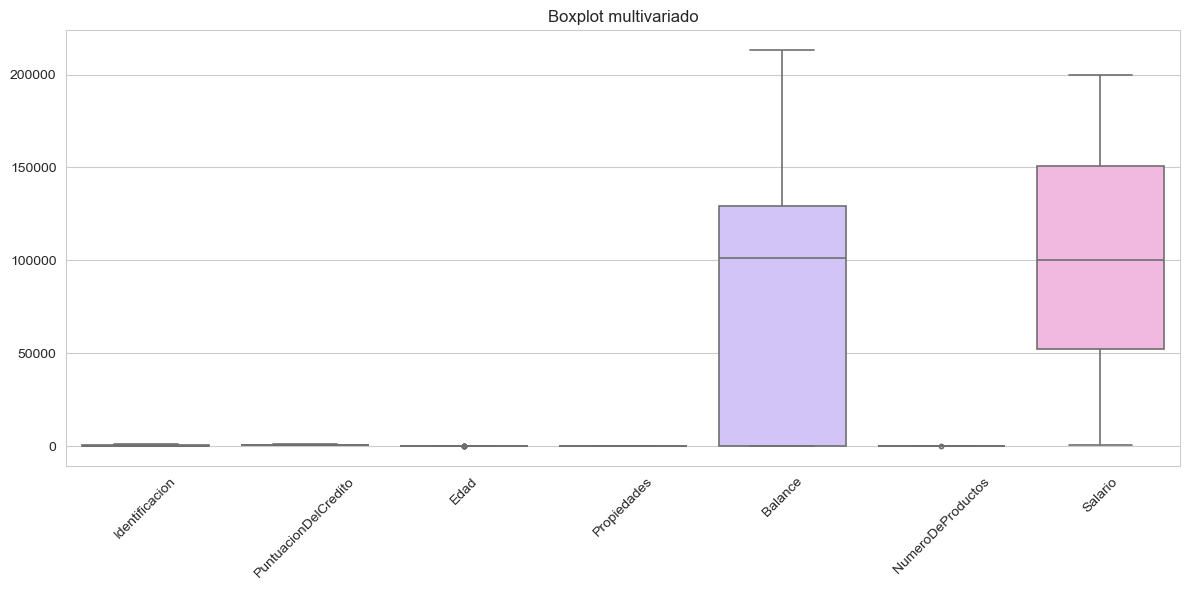

Se recomienda normalizar las variables numéricas debido a que tienen escalas diferentes
Shape de X: (393, 7)
Varianza explicada con 2 componentes: 0.38


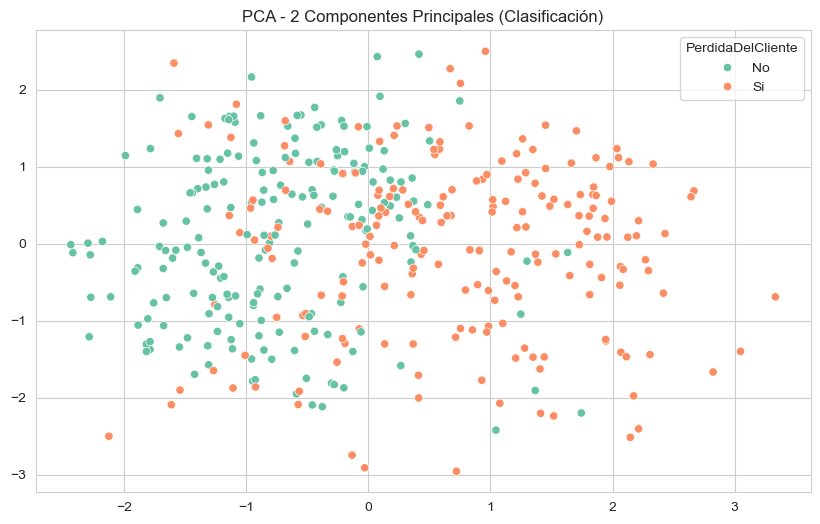

Varianza explicada con 3 componentes: 0.53


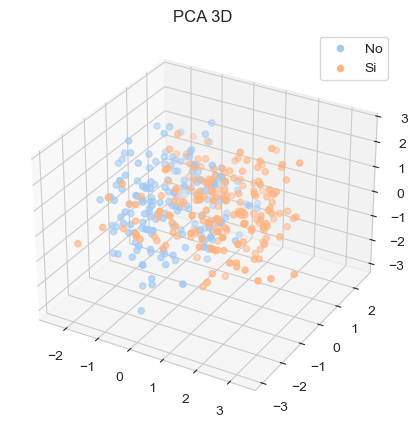


LDA con 1 componente(s):


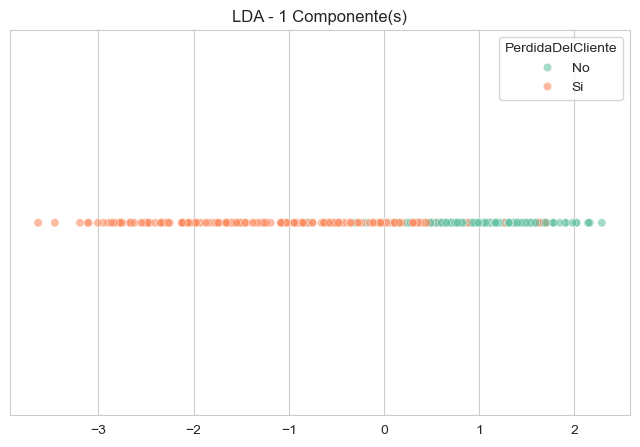

In [108]:
full_eda(df_bank, 'PerdidaDelCliente')